In [27]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import pymc as pm


## The NIPH data files.
https://github.com/folkehelseinstituttet/surveillance_data

In [28]:

# URL of the data files

#url="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_2022-03-18.xlsx"
url_msis_sexage="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_time_sex_age_latest.csv"
url_hosp="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_hospital_by_time_latest.csv"
url_lab="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_lab_by_time_latest.csv"
url_death="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_death_by_time_latest.csv"
url_demo="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_demographics_latest.csv"
url_msis_location="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_msis_by_location_latest.csv"
url_vac="https://github.com/folkehelseinstituttet/surveillance_data/raw/master/covid19/data_covid19_sysvak_by_time_location_latest.csv"
#url = "https://github.com/folkehelseinstituttet/surveillance_data/blob/67a2cb6ba56c10e78a296dfde7a9ceff185ae526/covid19/data_covid19_death_by_time_2022-03-18.xlsx"


In [29]:

# Read the cvs file from the URL
msis_sexage = pd.read_csv(url_msis_sexage)
msis_location = pd.read_csv(url_msis_location)

hosp = pd.read_csv(url_hosp)
lab=pd.read_csv(url_lab)
demo=pd.read_csv(url_demo)
death=pd.read_csv(url_death)
vac=pd.read_csv(url_vac)
# Change the dates to date_time
lab['date']=pd.to_datetime(lab.date)
death['date']=pd.to_datetime(death.date)
msis_location['date']=pd.to_datetime(msis_location.date)
msis_sexage['date']=pd.to_datetime(msis_sexage.date)
demo['date']=pd.to_datetime(demo.date)
hosp['date']=pd.to_datetime(hosp.date)
vac['date']=pd.to_datetime(vac.date)

Let us check the frequency of the data. We notice that all are on daily basis, apart from _death_ and _msis_sexage_ that are weekly numbers. 

In [30]:
# Calculate the time differences between consecutive entries in the date columns
# for each DataFrame and print the results.
print('lab dT: ' + str(lab.date[1]-lab.date[0]))
print('death dT: ' + str(death.date[1]-death.date[0]))
print('msis_sexage dT: ' + str((msis_sexage.date.unique()[1]-msis_sexage.date.unique()[0]).days))
print('demo dT: ' + str((demo.date[1]-demo.date[0])))
print('hosp dT: ' + str(hosp.date[1]-hosp.date[0]))
print('vac dT: ' + str(vac.date[1]-vac.date[0]))


lab dT: 1 days 00:00:00
death dT: 7 days 00:00:00
msis_sexage dT: 7
demo dT: 0 days 00:00:00
hosp dT: 1 days 00:00:00
vac dT: 1 days 00:00:00


### Extract some data
We take the national numbers, from the vaccination data and drop most of the columns. 
From the lab data we keep only the date and the negative and positive results. 

In [31]:
vac=vac[['date', 'n_dose_1',
       'n_dose_2', 'n_dose_3', 'n_dose_4', 'cum_n_dose_1', 'cum_n_dose_2',
       'cum_n_dose_3', 'cum_n_dose_4', 'cum_pr100_dose_1', 'cum_pr100_dose_2',
       'cum_pr100_dose_3', 'cum_pr100_dose_4', 'pop', 'location_name']].set_index('date')
vac

n_dose_1  n_dose_2  n_dose_3  n_dose_4  cum_n_dose_1  \
date                                                               
2020-12-02         0         0         0       NaN             0   
2020-12-03         0         0         0       NaN             0   
2020-12-04         0         0         0       NaN             0   
2020-12-05         0         0         0       NaN             0   
2020-12-06         0         0         0       NaN             0   
...              ...       ...       ...       ...           ...   
2022-11-09        43        59       419    5799.0       4346936   
2022-11-10        42        58       399    5385.0       4346978   
2022-11-11        16        25       211    2596.0       4346994   
2022-11-12         0         0         0      60.0       4346995   
2022-11-13         0         0         0       0.0       4346995   

            cum_n_dose_2  cum_n_dose_3  cum_n_dose_4  cum_pr100_dose_1  \
date                                                                     
2020-12-02             0             0           NaN               0.0   
2020-12-03             0             0           NaN               0.0   
2020-12-04             0             0           NaN               0.0   
2020-12-05             0             0           NaN               0.0   
2020-12-06             0             0           NaN               0.0   
...                  ...           ...           ...               ...   
2022-11-09       4054643       3005480      729702.0              80.1   
2022-11-10       4054701       3005879      735087.0              80.1   
2022-11-11       4054726       3006090      737683.0              80.1   
2022-11-12       4054726       3006093      737743.0              80.1   
2022-11-13       4054726       3006093      737746.0              80.1   

            cum_pr100_dose_2  cum_pr100_dose_3  cum_pr100_dose_4      pop  \
date                                                                        
2020-12-02               0.0               0.0               NaN   693494   
2020-12-03               0.0               0.0               NaN   693494   
2020-12-04               0.0               0.0               NaN   693494   
2020-12-05               0.0               0.0               NaN   693494   
2020-12-06               0.0               0.0               NaN   693494   
...                      ...               ...               ...      ...   
2022-11-09              74.7              55.4              13.5  5425270   
2022-11-10              74.7              55.4              13.5  5425270   
2022-11-11              74.7              55.4              13.6  5425270   
2022-11-12              74.7              55.4              13.6  5425270   
2022-11-13              74.7              55.4              13.6  5425270   

           location_name  
date                      
2020-12-02          Oslo  
2020-12-03          Oslo  
2020-12-04          Oslo  
2020-12-05          Oslo  
2020-12-06          Oslo  
...                  ...  
2022-11-09         Norge  
2022-11-10         Norge  
2022-11-11         Norge  
2022-11-12         Norge  
2022-11-13         Norge  

[8544 rows x 14 columns]

In [32]:
# Filter the vaccination data for 'Norge' and drop any rows with missing values
tmp=vac.where(vac['location_name']=='Norge').dropna().copy()

#tmp.drop(columns=[tmp.columns[i] for i in range(11)], inplace=True)
lab_hosp=lab[['date','n_neg','n_pos']].set_index('date')
lab_hosp=lab_hosp.join(tmp)
tmp=hosp[['date','n_icu','n_hospital_main_cause']].set_index('date')
lab_hosp=lab_hosp.join(tmp)
lab_hosp=lab_hosp.drop(columns=['location_name'])

lab_hosp

n_neg  n_pos  n_dose_1  n_dose_2  n_dose_3  n_dose_4  \
date                                                               
2020-04-01   3736    198       NaN       NaN       NaN       NaN   
2020-04-02   3361    198       NaN       NaN       NaN       NaN   
2020-04-03   3394    164       NaN       NaN       NaN       NaN   
2020-04-04   1301     88       NaN       NaN       NaN       NaN   
2020-04-05   1048     72       NaN       NaN       NaN       NaN   
...           ...    ...       ...       ...       ...       ...   
2022-11-09    978    150      43.0      59.0     419.0    5799.0   
2022-11-10    859    118      42.0      58.0     399.0    5385.0   
2022-11-11    589     96      16.0      25.0     211.0    2596.0   
2022-11-12    251     39       0.0       0.0       0.0      60.0   
2022-11-13    236     36       0.0       0.0       0.0       0.0   

            cum_n_dose_1  cum_n_dose_2  cum_n_dose_3  cum_n_dose_4  \
date                                                                 
2020-04-01           NaN           NaN           NaN           NaN   
2020-04-02           NaN           NaN           NaN           NaN   
2020-04-03           NaN           NaN           NaN           NaN   
2020-04-04           NaN           NaN           NaN           NaN   
2020-04-05           NaN           NaN           NaN           NaN   
...                  ...           ...           ...           ...   
2022-11-09     4346936.0     4054643.0     3005480.0      729702.0   
2022-11-10     4346978.0     4054701.0     3005879.0      735087.0   
2022-11-11     4346994.0     4054726.0     3006090.0      737683.0   
2022-11-12     4346995.0     4054726.0     3006093.0      737743.0   
2022-11-13     4346995.0     4054726.0     3006093.0      737746.0   

            cum_pr100_dose_1  cum_pr100_dose_2  cum_pr100_dose_3  \
date                                                               
2020-04-01               NaN               NaN               NaN   
2020-04-02               NaN               NaN               NaN   
2020-04-03               NaN               NaN               NaN   
2020-04-04               NaN               NaN               NaN   
2020-04-05               NaN               NaN               NaN   
...                      ...               ...               ...   
2022-11-09              80.1              74.7              55.4   
2022-11-10              80.1              74.7              55.4   
2022-11-11              80.1              74.7              55.4   
2022-11-12              80.1              74.7              55.4   
2022-11-13              80.1              74.7              55.4   

            cum_pr100_dose_4        pop  n_icu  n_hospital_main_cause  
date                                                                   
2020-04-01               NaN        NaN      4                     27  
2020-04-02               NaN        NaN      4                     37  
2020-04-03               NaN        NaN      5                     21  
2020-04-04               NaN        NaN      3                     27  
2020-04-05               NaN        NaN      4                     14  
...                      ...        ...    ...                    ...  
2022-11-09              13.5  5425270.0      0                     15  
2022-11-10              13.5  5425270.0      1                     10  
2022-11-11              13.6  5425270.0      1                      1  
2022-11-12              13.6  5425270.0      0                      3  
2022-11-13              13.6  5425270.0      2                      0  

[957 rows x 17 columns]

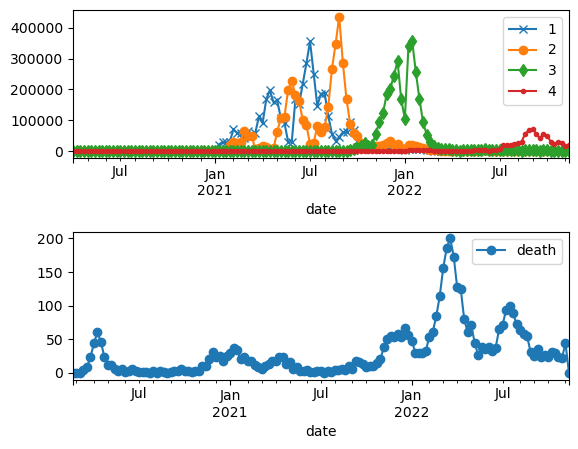

In [33]:
fig, axs = plt.subplots(2,1)
lab_hosp.resample('W').sum().n_dose_1.plot(marker='x',ax=axs[0])
lab_hosp.resample('W').sum().n_dose_2.plot(marker='o',ax=axs[0])
lab_hosp.resample('W').sum().n_dose_3.plot(marker='d',ax=axs[0])
lab_hosp.resample('W').sum().n_dose_4.plot(marker='.',ax=axs[0])
#lab_hosp.resample('W').sum().n_pos.plot(marker='x',ax=axs[0])
#lab_hosp.resample('W').sum().n_neg.plot(marker='d',ax=axs[0])
axs[0].legend(['1','2','3','4','pos','neg'])
plt.subplots_adjust(wspace=1.6)
plt.subplots_adjust(hspace=0.5)
death.groupby('date').sum().n.plot(marker='o',ax=axs[1])
plt.legend(['death']);

plt.show()


## MSIS
These files contain the total number of reported COVID-19 cases for Norway, the counties of Norway, and the municipalities of Norway.


In [34]:
msis_sexage.head()

granularity_time granularity_geo location_code  border    age     sex  year  \
0             week          nation         norge    2020    0-9  female  2020   
1             week          nation         norge    2020    0-9    male  2020   
2             week          nation         norge    2020  10-19  female  2020   
3             week          nation         norge    2020  10-19    male  2020   
4             week          nation         norge    2020  20-29  female  2020   

   week     yrwk     season     x       date  n date_of_publishing  
0     8  2020-08  2019/2020  31.0 2020-02-23  0         2022-11-14  
1     8  2020-08  2019/2020  31.0 2020-02-23  0         2022-11-14  
2     8  2020-08  2019/2020  31.0 2020-02-23  0         2022-11-14  
3     8  2020-08  2019/2020  31.0 2020-02-23  0         2022-11-14  
4     8  2020-08  2019/2020  31.0 2020-02-23  1         2022-11-14

<Axes: xlabel='date', ylabel='n'>

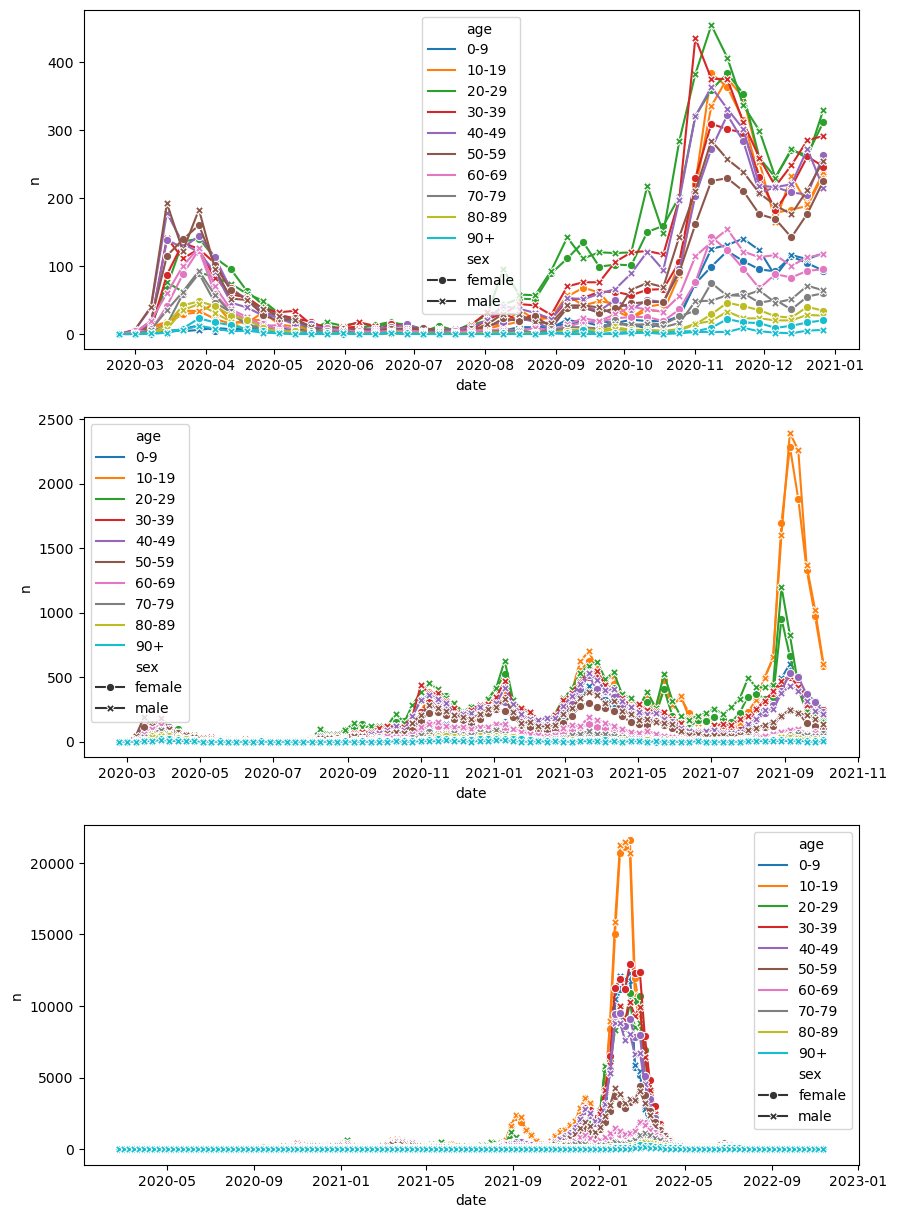

In [35]:
fig,axs=plt.subplots(3,1,figsize=(10,15))
sns.lineplot(data=msis_sexage,x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[2])
sns.lineplot(data=msis_sexage[:1700],x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[1])
sns.lineplot(data=msis_sexage[:900],x=msis_sexage.date,y='n', hue='age', style='sex',markers=True, dashes=False,ax=axs[0])

Save the total cases to a file for future references. 

In [36]:
msis_sexage.groupby('date').sum().n.to_csv('cases.csv')

### Tests and hospitals


In [37]:
lab.head()

granularity_time granularity_geo location_code  border    age    sex  year  \
0              day          nation         norge    2020  total  total  2020   
1              day          nation         norge    2020  total  total  2020   
2              day          nation         norge    2020  total  total  2020   
3              day          nation         norge    2020  total  total  2020   
4              day          nation         norge    2020  total  total  2020   

   week     yrwk     season     x       date  n_neg  n_pos  pr100_pos  \
0    14  2020-14  2019/2020  37.0 2020-04-01   3736    198        5.0   
1    14  2020-14  2019/2020  37.0 2020-04-02   3361    198        5.6   
2    14  2020-14  2019/2020  37.0 2020-04-03   3394    164        4.6   
3    14  2020-14  2019/2020  37.0 2020-04-04   1301     88        6.3   
4    14  2020-14  2019/2020  37.0 2020-04-05   1048     72        6.4   

  date_of_publishing  
0         2022-11-14  
1         2022-11-14  
2         2022-11-14  
3         2022-11-14  
4         2022-11-14

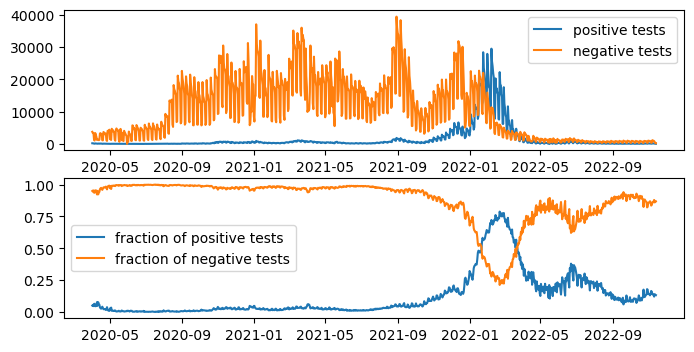

In [38]:
fig,axs=plt.subplots(2,1,figsize=(8,4))
axs[0].plot(pd.to_datetime(lab.date),lab.n_pos,pd.to_datetime(lab.date),lab.n_neg)
axs[0].legend(['positive tests','negative tests'])
axs[1].plot(pd.to_datetime(lab.date),lab.n_pos/(lab.n_pos+lab.n_neg),pd.to_datetime(lab.date),lab.n_neg/(lab.n_pos+lab.n_neg))
axs[1].legend(['fraction of positive tests','fraction of negative tests'])


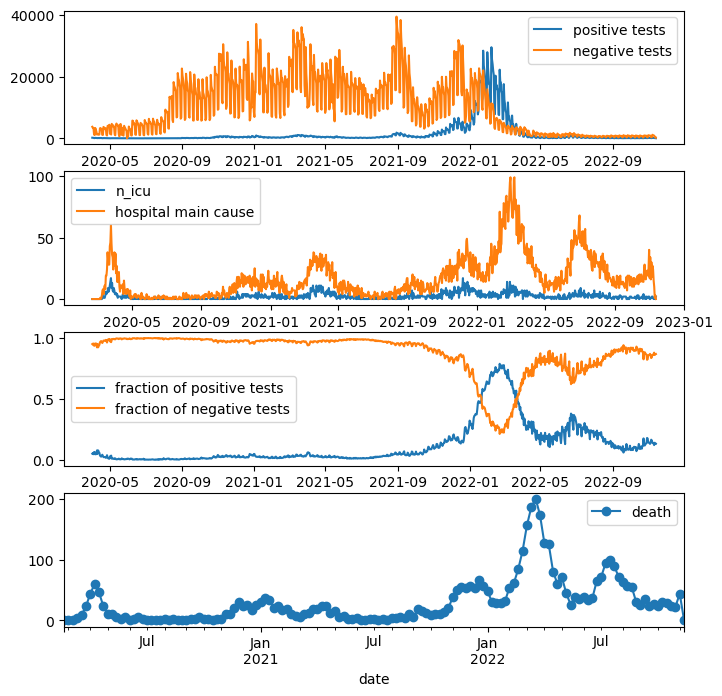

In [39]:
fig,axs=plt.subplots(4,1,figsize=(8,8))
axs[1].plot(pd.to_datetime(hosp.date),hosp.n_icu,pd.to_datetime(hosp.date),hosp.n_hospital_main_cause)
axs[1].legend(['n_icu','hospital main cause'])
axs[0].plot(pd.to_datetime(lab.date),lab.n_pos,pd.to_datetime(lab.date),lab.n_neg)
axs[0].legend(['positive tests','negative tests'])
axs[2].plot(pd.to_datetime(lab.date),lab.n_pos/(lab.n_pos+lab.n_neg),pd.to_datetime(lab.date),lab.n_neg/(lab.n_pos+lab.n_neg))
axs[2].legend(['fraction of positive tests','fraction of negative tests'])
death.groupby('date').sum().n.plot(marker='o',ax=axs[3])
axs[3].legend(['death']);

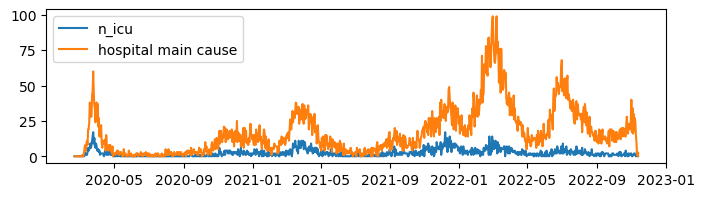

In [14]:
fig,axs=plt.subplots(1,1,figsize=(8,2))
plt.plot(pd.to_datetime(hosp.date),hosp.n_icu,pd.to_datetime(hosp.date),hosp.n_hospital_main_cause)
plt.legend(['n_icu','hospital main cause'])

# Time series change point detection

In [43]:
death

granularity_time granularity_geo location_code  border    age    sex  \
0            isoweek          nation         norge    2020  total  total   
1            isoweek          nation         norge    2020  total  total   
2            isoweek          nation         norge    2020  total  total   
3            isoweek          nation         norge    2020  total  total   
4            isoweek          nation         norge    2020  total  total   
..               ...             ...           ...     ...    ...    ...   
138          isoweek          nation         norge    2020  total  total   
139          isoweek          nation         norge    2020  total  total   
140          isoweek          nation         norge    2020  total  total   
141          isoweek          nation         norge    2020  total  total   
142          isoweek          nation         norge    2020  total  total   

     year  week     yrwk     season     x       date   n date_of_publishing  
0    2020     8  2020-08  2019/2020  31.0 2020-02-23   0         2022-11-14  
1    2020     9  2020-09  2019/2020  32.0 2020-03-01   0         2022-11-14  
2    2020    10  2020-10  2019/2020  33.0 2020-03-08   0         2022-11-14  
3    2020    11  2020-11  2019/2020  34.0 2020-03-15   4         2022-11-14  
4    2020    12  2020-12  2019/2020  35.0 2020-03-22   9         2022-11-14  
..    ...   ...      ...        ...   ...        ...  ..                ...  
138  2022    41  2022-41  2022/2023  12.0 2022-10-16  29         2022-11-14  
139  2022    42  2022-42  2022/2023  13.0 2022-10-23  23         2022-11-14  
140  2022    43  2022-43  2022/2023  14.0 2022-10-30  22         2022-11-14  
141  2022    44  2022-44  2022/2023  15.0 2022-11-06  44         2022-11-14  
142  2022    45  2022-45  2022/2023  16.0 2022-11-13   0         2022-11-14  

[143 rows x 14 columns]

In [101]:
# Collect positive tests, negative tests, hospitalizations, and deaths into a single DataFrame

# Ensure all sources use 'date' as index or column
lab_data = lab[['date', 'n_pos', 'n_neg']].copy()
hosp_data = hosp[['date', 'n_hospital_main_cause']].copy()
d_tmp=death.groupby('date').sum() 
death_data = d_tmp[['n']].copy()

# Merge all datasets on 'date'
combined_df = lab_data.merge(hosp_data, on='date', how='outer')
combined_df = combined_df.merge(death_data, on='date', how='outer')
combined_df.set_index('date', inplace=True)
# Optionally, sort by date
#combined_df = combined_df.sort_values('date').reset_index(drop=True)
# Check for missing values in the 'n' column after merging


# Check for any rows with non-null death counts

# If the merged DataFrame has mostly NaN for 'n', you may need to use an 'outer' join (already used) and sort by date:
#combined_df = combined_df.sort_values('date').reset_index(drop=True)
combined_df.head()

n_pos  n_neg  n_hospital_main_cause    n
date                                                
2020-02-21    NaN    NaN                      0  NaN
2020-02-22    NaN    NaN                      0  NaN
2020-02-23    NaN    NaN                      0  0.0
2020-02-24    NaN    NaN                      0  NaN
2020-02-25    NaN    NaN                      0  NaN

<Axes: xlabel='date'>

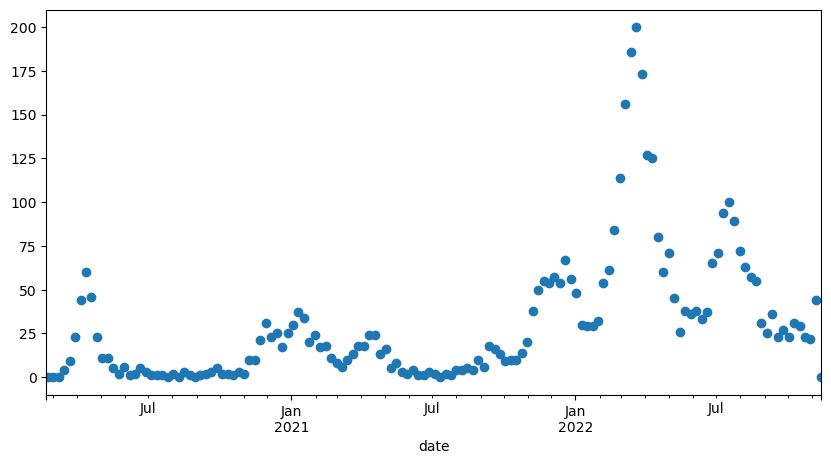

In [102]:
combined_df.n.plot(marker='o', figsize=(10, 5))

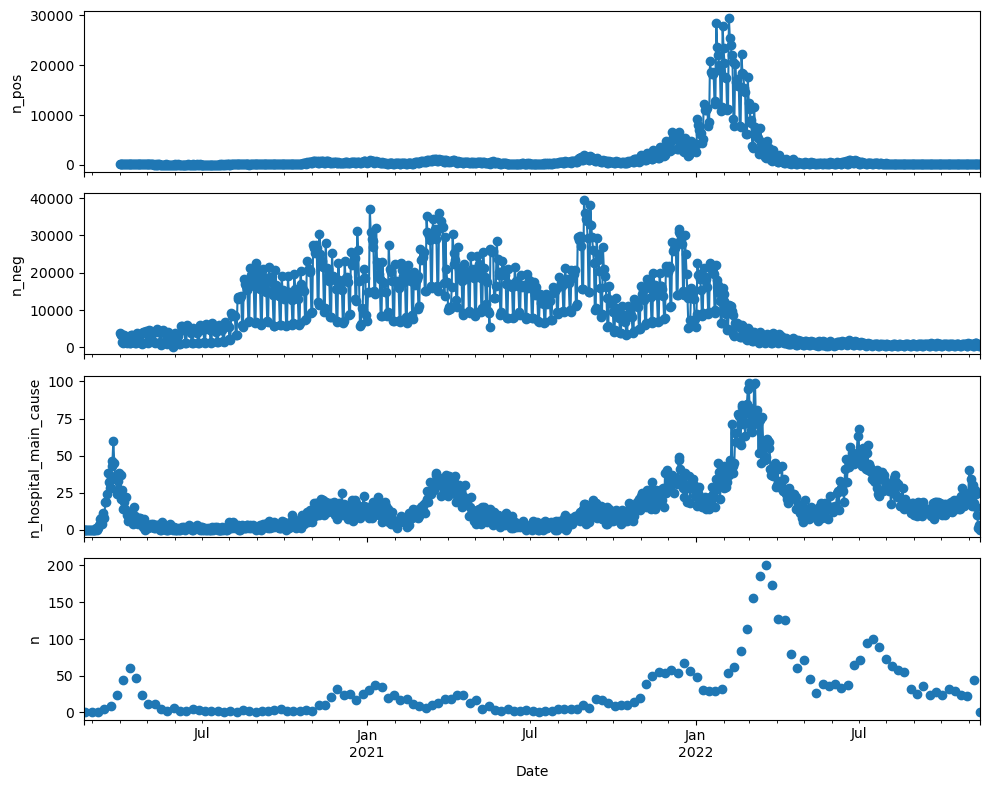

In [105]:

fig, axs = plt.subplots(combined_df.shape[1], 1, figsize=(10, 8), sharex=True)
for idx, col in enumerate(combined_df.columns[0:]):
    combined_df[col].plot(marker='o', ax=axs[idx])
    axs[idx].set_ylabel(col)
axs[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

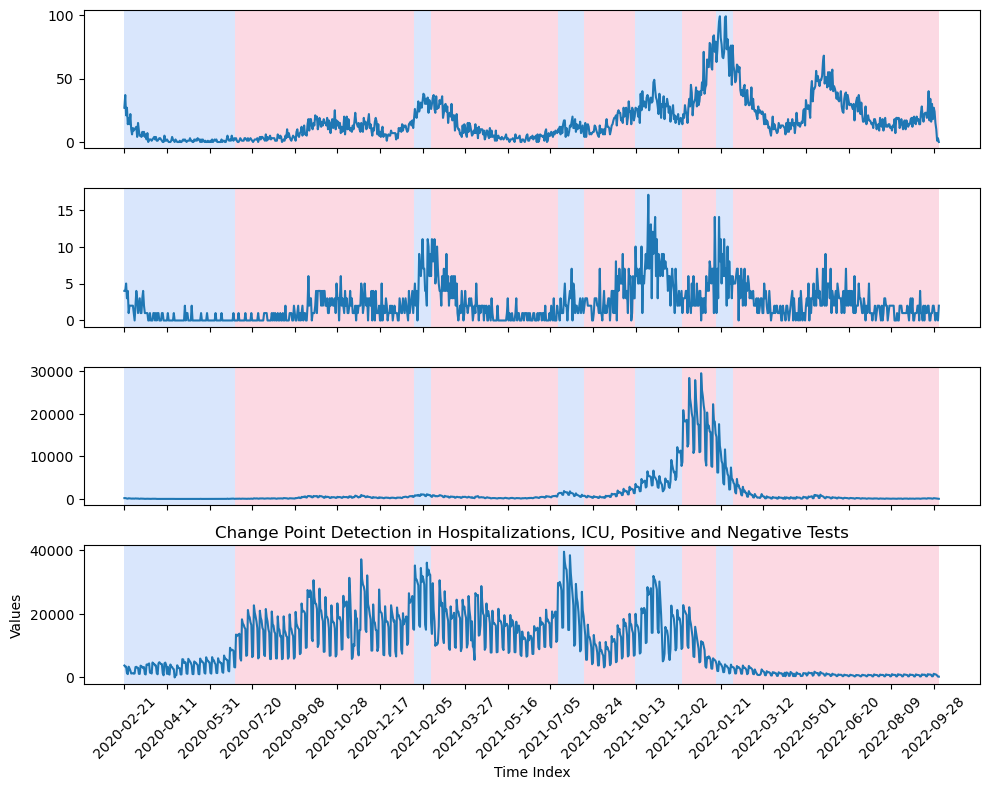

Detected change points (multivariate): [130, 340, 360, 510, 540, 600, 655, 695, 715, 957]
Detected change points: [20, 55, 245, 380, 425, 615, 720, 765, 790, 840, 905, 997]


In [118]:
%pip install ruptures


import ruptures as rpt

# Use the hospitalizations as the time series for change point detection
series = hosp['n_hospital_main_cause'].values

# Use the Pelt algorithm with a linear cost, searching for change points
algo = rpt.Pelt(model="rbf").fit(series)
result = algo.predict(pen=10)
# Merge hosp and lab data on date to align the time series
merged = pd.merge(
    hosp[['date', 'n_hospital_main_cause', 'n_icu']],
    lab[['date', 'n_pos', 'n_neg']],
    on='date',
    how='inner'
)

# Stack all four time series into a 2D array for multivariate change point detection
multivariate_series = np.column_stack([
    merged['n_hospital_main_cause'].values,
    merged['n_icu'].values,
    merged['n_pos'].values,
    merged['n_neg'].values
])

# Fit the Pelt algorithm for multivariate data
algo_multi = rpt.Pelt(model="rbf").fit(multivariate_series)
result_multi = algo_multi.predict(pen=5)

# Plot the results for the multivariate series
plt.figure(figsize=(12, 6))
rpt.display(multivariate_series, result_multi)
plt.title("Change Point Detection in Hospitalizations, ICU, Positive and Negative Tests")
plt.xlabel("Time Index")
plt.ylabel("Values")
plt.xticks(ticks=np.arange(len(hosp['date'].values))[::50], labels=pd.to_datetime(hosp['date'].values)[::50].strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()

print("Detected change points (multivariate):", result_multi)
print("Detected change points:", result)

## Vaccination

set the index to date for easier plotting.

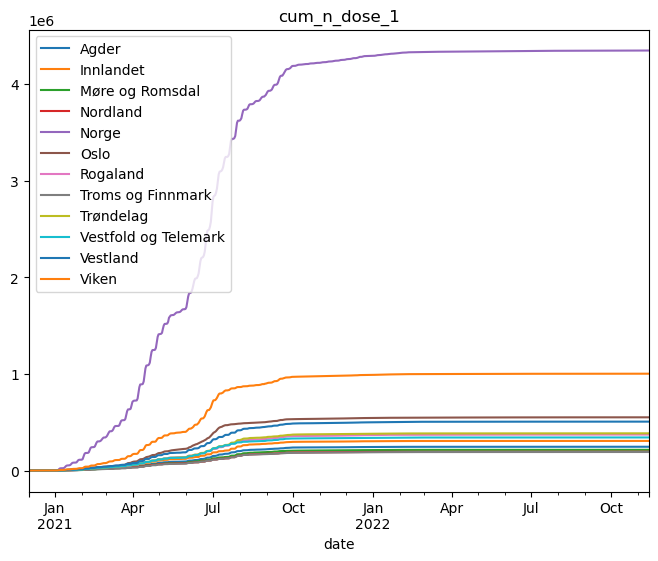

In [15]:
variable='cum_n_dose_1'
fig,axs=plt.subplots(1,1,figsize=(8,6))

vac.groupby('location_name')[variable].plot(legend=True,title=variable, ax=axs);

Is this the right way to present the data?

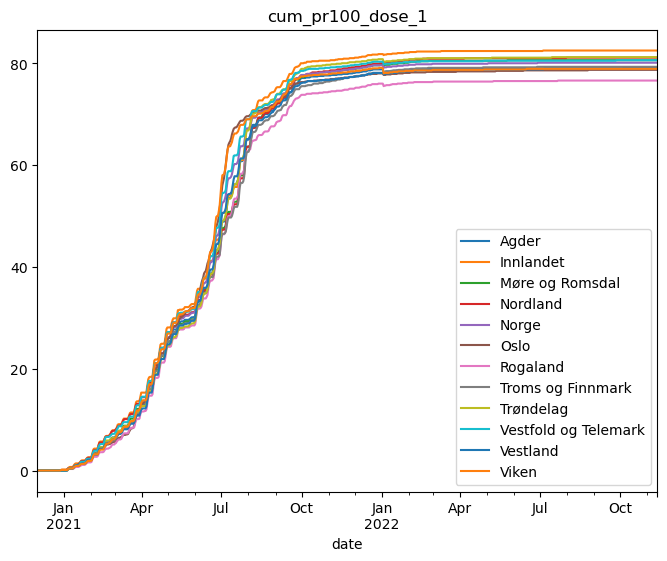

In [16]:
variable='cum_pr100_dose_1'
fig,axs=plt.subplots(1,1,figsize=(8,6))

vac.groupby('location_name')[variable].plot(legend=True,title=variable, ax=axs);

In [17]:
vac

n_dose_1  n_dose_2  n_dose_3  n_dose_4  cum_n_dose_1  \
date                                                               
2020-12-02         0         0         0       NaN             0   
2020-12-03         0         0         0       NaN             0   
2020-12-04         0         0         0       NaN             0   
2020-12-05         0         0         0       NaN             0   
2020-12-06         0         0         0       NaN             0   
...              ...       ...       ...       ...           ...   
2022-11-09        43        59       419    5799.0       4346936   
2022-11-10        42        58       399    5385.0       4346978   
2022-11-11        16        25       211    2596.0       4346994   
2022-11-12         0         0         0      60.0       4346995   
2022-11-13         0         0         0       0.0       4346995   

            cum_n_dose_2  cum_n_dose_3  cum_n_dose_4  cum_pr100_dose_1  \
date                                                                     
2020-12-02             0             0           NaN               0.0   
2020-12-03             0             0           NaN               0.0   
2020-12-04             0             0           NaN               0.0   
2020-12-05             0             0           NaN               0.0   
2020-12-06             0             0           NaN               0.0   
...                  ...           ...           ...               ...   
2022-11-09       4054643       3005480      729702.0              80.1   
2022-11-10       4054701       3005879      735087.0              80.1   
2022-11-11       4054726       3006090      737683.0              80.1   
2022-11-12       4054726       3006093      737743.0              80.1   
2022-11-13       4054726       3006093      737746.0              80.1   

            cum_pr100_dose_2  cum_pr100_dose_3  cum_pr100_dose_4      pop  \
date                                                                        
2020-12-02               0.0               0.0               NaN   693494   
2020-12-03               0.0               0.0               NaN   693494   
2020-12-04               0.0               0.0               NaN   693494   
2020-12-05               0.0               0.0               NaN   693494   
2020-12-06               0.0               0.0               NaN   693494   
...                      ...               ...               ...      ...   
2022-11-09              74.7              55.4              13.5  5425270   
2022-11-10              74.7              55.4              13.5  5425270   
2022-11-11              74.7              55.4              13.6  5425270   
2022-11-12              74.7              55.4              13.6  5425270   
2022-11-13              74.7              55.4              13.6  5425270   

           location_name  
date                      
2020-12-02          Oslo  
2020-12-03          Oslo  
2020-12-04          Oslo  
2020-12-05          Oslo  
2020-12-06          Oslo  
...                  ...  
2022-11-09         Norge  
2022-11-10         Norge  
2022-11-11         Norge  
2022-11-12         Norge  
2022-11-13         Norge  

[8544 rows x 14 columns]

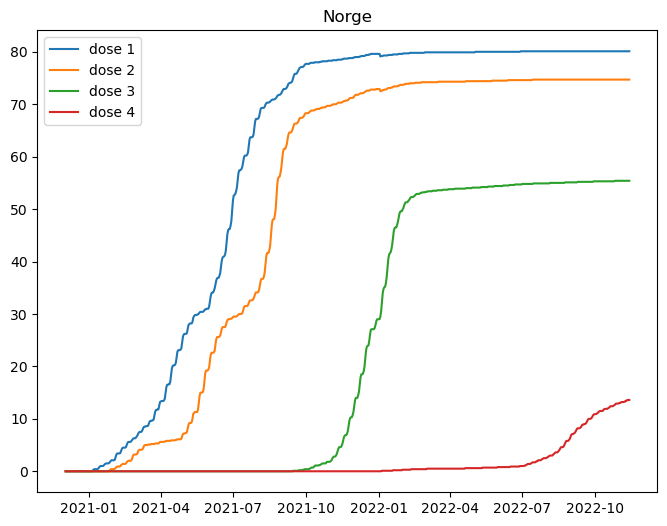

In [18]:
tmp=vac.where(vac['location_name']=='Norge').dropna()
fig,axs=plt.subplots(1,1,figsize=(8,6))
plt.plot(tmp['cum_pr100_dose_1'])
plt.plot(tmp['cum_pr100_dose_2'])
plt.plot(tmp['cum_pr100_dose_3'])
plt.plot(tmp['cum_pr100_dose_4'])
plt.legend(['dose 1','dose 2','dose 3','dose 4'])
plt.title('Norge');

## Estimate the R number

<Axes: xlabel='date'>

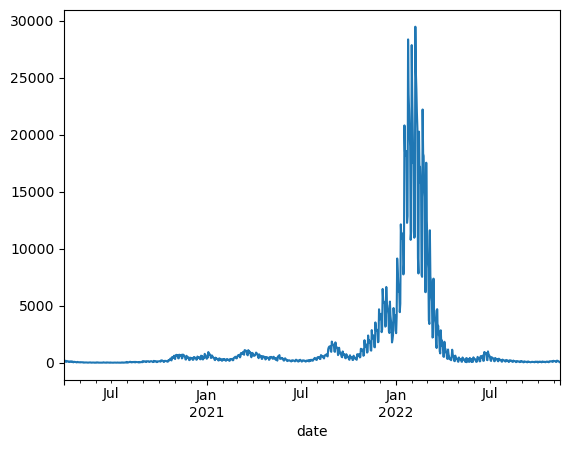

In [19]:
npos=lab.set_index('date').n_pos
npos.plot()

In [20]:
msis_sexage.groupby('date').sum().n

date
2020-02-23       1
2020-03-01      30
2020-03-08     217
2020-03-15    1215
2020-03-22    1438
              ... 
2022-10-16     499
2022-10-23     561
2022-10-30     780
2022-11-06     879
2022-11-13     786
Name: n, Length: 143, dtype: int64

In [21]:
import numpy as np
import pandas as pd

def estimate_R(incidence, serial_interval):
    """
    Estimate the time-varying reproduction number R_t.
    
    Parameters:
    incidence (list): List of new cases per time unit.
    serial_interval (list): List of probabilities for the serial interval distribution.
    
    Returns:
    R_t (list): Estimated reproduction number over time.
    """
    incidence = np.array(incidence)
    serial_interval = np.array(serial_interval)
    
    # Ensure the serial interval sums to 1
    serial_interval /= serial_interval.sum()
    
    # Calculate the effective reproduction number R_t
    R_t = []
    for t in range(1, len(incidence)):
        lambda_t = sum(incidence[t-i] * serial_interval[i] for i in range(1, min(t, len(serial_interval))))
        if lambda_t > 0:
            R_t.append(incidence[t] / lambda_t)
        else:
            R_t.append(np.nan)
    
    return R_t


Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.8 MB/s eta 0:00:00
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9094 sha256=37950947aec1000eddca05eb0576142f35c2065d996ce9444d0b6b75777cb49a
  Stored in directory: /Users/guttorm/Library/Caches/pip/wheels/a4/11/f5/8265470e17d280d8b5910e1b0f298521420a5086d696e96799
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=13912 sha256=d69af51afda127a1afe5970ed460f0ce97df1a636e6dfae8d1487fa636842409
  Stored in directory: /Users/guttorm/Library/Caches/pip/wheels/ba/95/1f/29d557452d7f5102769deb2bdc49055be4505fb16c1b135a74
  Created wheel for etuples: filename=etuples-0

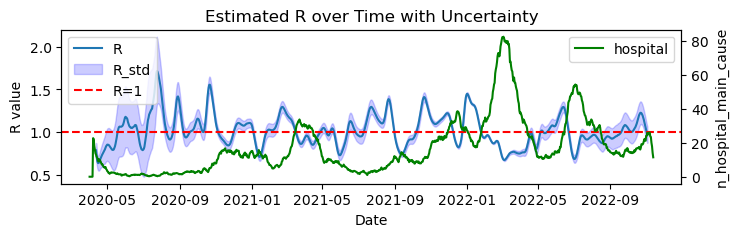

In [26]:
%pip install epyestim
%pip install pymc
import epyestim
from epyestim import estimate_r
import epyestim.covid19 as covid19
import pymc as pm
import arviz as az

# Generate synthetic data for the number of new infections per day
incidence_data = lab_hosp.n_pos.rolling(window=7).mean().fillna(0)
hospital=lab_hosp.n_hospital_main_cause.rolling(window=7).mean().fillna(0)

# Estimate the R number using epyestim
r_estimates = covid19.r_covid(incidence_data)#, smoothing_window=7)
r_estimates['R_std']=np.sqrt(r_estimates['R_var'])


# Plot the R estimates with uncertainty
fig, ax = plt.subplots(figsize=(8, 2))
sns.lineplot(data=r_estimates, x=r_estimates.index, y='R_mean', ax=ax, label='R')
ax.fill_between(r_estimates.index, r_estimates['R_mean'] - 2*r_estimates['R_std'], r_estimates['R_mean'] + 2*r_estimates['R_std'], color='b', alpha=0.2, label='R_std')
ax.axhline(y=1, color='r', linestyle='--', label='R=1')
ax.set_xlabel('Date')
ax.set_ylabel('R value')
ax.set_title('Estimated R over Time with Uncertainty')
# Plot the incident data on the twin axis
ax.legend()
ax2 = ax.twinx()
hospital_df = hospital.reset_index()
sns.lineplot(data=hospital_df, x='date', y='n_hospital_main_cause', ax=ax2, color='g', label='hospital')
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left')
ax2.legend(handles=handles2, labels=labels2, loc='best')

# ax.set_xlim(right=pd.Timestamp('2021-12-31'))
# # Rescale y-axis in ax2
# ax2.set_ylim(0, 10000)

plt.show()


In [27]:
hospital_df

date  n_hospital_main_cause
0   2020-04-01               0.000000
1   2020-04-02               0.000000
2   2020-04-03               0.000000
3   2020-04-04               0.000000
4   2020-04-05               0.000000
..         ...                    ...
952 2022-11-09              23.428571
953 2022-11-10              20.000000
954 2022-11-11              17.857143
955 2022-11-12              14.000000
956 2022-11-13              11.428571

[957 rows x 2 columns]

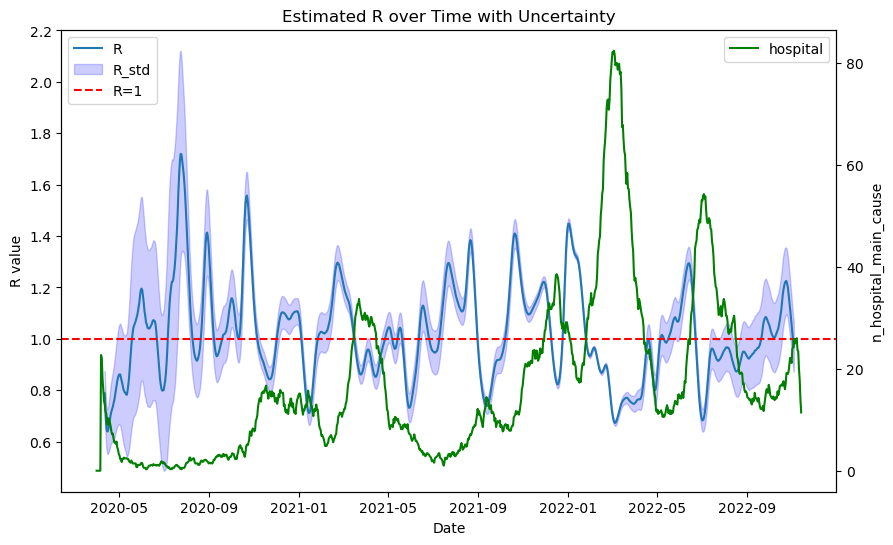

In [28]:
import epyestim
from epyestim import estimate_r
import epyestim.covid19 as covid19
import pymc as pm
import arviz as az

# Generate synthetic data for the number of new infections per day
incidence_data = lab_hosp.n_pos.rolling(window=7).mean().fillna(0)
hospital=lab_hosp.n_hospital_main_cause.rolling(window=7).mean().fillna(0)

# Estimate the R number using epyestim
r_estimates = covid19.r_covid(incidence_data)#, smoothing_window=7)
r_estimates['R_std']=np.sqrt(r_estimates['R_var'])


# Plot the R estimates with uncertainty
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=r_estimates, x=r_estimates.index, y='R_mean', ax=ax, label='R')
ax.fill_between(r_estimates.index, r_estimates['R_mean'] - 2*r_estimates['R_std'], r_estimates['R_mean'] + 2*r_estimates['R_std'], color='b', alpha=0.2, label='R_std')
ax.axhline(y=1, color='r', linestyle='--', label='R=1')
ax.set_xlabel('Date')
ax.set_ylabel('R value')
ax.set_title('Estimated R over Time with Uncertainty')
# Plot the incident data on the twin axis
ax.legend()
ax2 = ax.twinx()
hospital_df = hospital.reset_index()
sns.lineplot(data=hospital_df, x='date', y='n_hospital_main_cause', ax=ax2, color='g', label='hospital')
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left')
ax2.legend(handles=handles2, labels=labels2, loc='best')

# ax.set_xlim(right=pd.Timestamp('2021-12-31'))
# # Rescale y-axis in ax2
# ax2.set_ylim(0, 10000)

plt.show()


In [29]:
lab_hosp

n_neg  n_pos  n_dose_1  n_dose_2  n_dose_3  n_dose_4  \
date                                                               
2020-04-01   3736    198       NaN       NaN       NaN       NaN   
2020-04-02   3361    198       NaN       NaN       NaN       NaN   
2020-04-03   3394    164       NaN       NaN       NaN       NaN   
2020-04-04   1301     88       NaN       NaN       NaN       NaN   
2020-04-05   1048     72       NaN       NaN       NaN       NaN   
...           ...    ...       ...       ...       ...       ...   
2022-11-09    978    150      43.0      59.0     419.0    5799.0   
2022-11-10    859    118      42.0      58.0     399.0    5385.0   
2022-11-11    589     96      16.0      25.0     211.0    2596.0   
2022-11-12    251     39       0.0       0.0       0.0      60.0   
2022-11-13    236     36       0.0       0.0       0.0       0.0   

            cum_n_dose_1  cum_n_dose_2  cum_n_dose_3  cum_n_dose_4  \
date                                                                 
2020-04-01           NaN           NaN           NaN           NaN   
2020-04-02           NaN           NaN           NaN           NaN   
2020-04-03           NaN           NaN           NaN           NaN   
2020-04-04           NaN           NaN           NaN           NaN   
2020-04-05           NaN           NaN           NaN           NaN   
...                  ...           ...           ...           ...   
2022-11-09     4346936.0     4054643.0     3005480.0      729702.0   
2022-11-10     4346978.0     4054701.0     3005879.0      735087.0   
2022-11-11     4346994.0     4054726.0     3006090.0      737683.0   
2022-11-12     4346995.0     4054726.0     3006093.0      737743.0   
2022-11-13     4346995.0     4054726.0     3006093.0      737746.0   

            cum_pr100_dose_1  cum_pr100_dose_2  cum_pr100_dose_3  \
date                                                               
2020-04-01               NaN               NaN               NaN   
2020-04-02               NaN               NaN               NaN   
2020-04-03               NaN               NaN               NaN   
2020-04-04               NaN               NaN               NaN   
2020-04-05               NaN               NaN               NaN   
...                      ...               ...               ...   
2022-11-09              80.1              74.7              55.4   
2022-11-10              80.1              74.7              55.4   
2022-11-11              80.1              74.7              55.4   
2022-11-12              80.1              74.7              55.4   
2022-11-13              80.1              74.7              55.4   

            cum_pr100_dose_4        pop  n_icu  n_hospital_main_cause  
date                                                                   
2020-04-01               NaN        NaN      4                     27  
2020-04-02               NaN        NaN      4                     37  
2020-04-03               NaN        NaN      5                     21  
2020-04-04               NaN        NaN      3                     27  
2020-04-05               NaN        NaN      4                     14  
...                      ...        ...    ...                    ...  
2022-11-09              13.5  5425270.0      0                     15  
2022-11-10              13.5  5425270.0      1                     10  
2022-11-11              13.6  5425270.0      1                      1  
2022-11-12              13.6  5425270.0      0                      3  
2022-11-13              13.6  5425270.0      2                      0  

[957 rows x 17 columns]

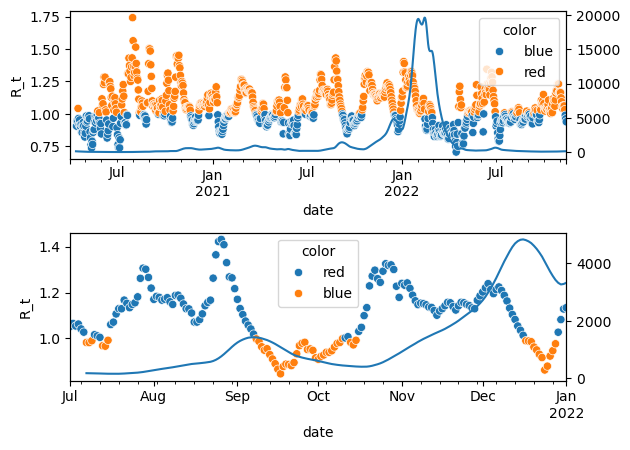

In [30]:

# Example incidence data (number of new cases per day)
incidence_data = lab_hosp.n_pos.rolling(window=7).mean()

# Example serial interval distribution
serial_interval = [0.04, 0.15, 0.25, 0.25, 0.15, 0.1, 0.05,0.01]

# Estimate R_t
R_t = estimate_R(incidence_data, serial_interval)

# Convert to a pandas DataFrame for better visualization
df = pd.DataFrame({'Day': range(1, len(R_t) + 1), 'R_t': R_t, 'n': incidence_data[1:]})

df['color'] = np.where(df['R_t'] > 1, 'red', 'blue')


fig,axs=plt.subplots(2,1)

sns.scatterplot(data=df, x=df.index, y=df.R_t, hue='color', ax=axs[0])
ax2=axs[0].twinx()
df.n.rolling(window=7).mean().plot(ax=ax2)

tmp=df.loc['2021-07-01':'2022-01-01']
sns.scatterplot(data=tmp, x=tmp.index, y=tmp.R_t, hue='color', ax=axs[1])
ax2=axs[1].twinx()
tmp.n.rolling(window=7).mean().plot(ax=ax2)
plt.subplots_adjust(hspace=0.5) 

#event_date = pd.to_datetime('2021-07-15')
#plt.axvline(event_date, color='r', linestyle='--')

# Add text to the plot
#plt.text(event_date, 250, 'Event', color='r', ha='right')

#data.cases.plot()

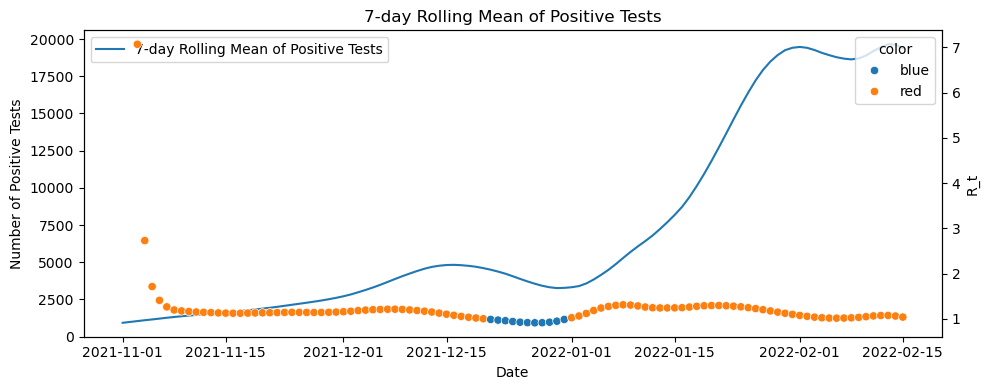

In [31]:
# Plot the incident data only, rolling 7 days
incidence_data_rolling = incidence_data.rolling(window=7).mean()
# Filter the incidence data for January-February 2022
jan_feb_2022 = incidence_data_rolling.loc['2021-11-01':'2022-02-15']
# Plot the filtered data
R_t_focus = estimate_R(jan_feb_2022, serial_interval)
df_focus = pd.DataFrame({'Day': range(1, len(R_t_focus) + 1), 'R_t': R_t_focus, 'n': jan_feb_2022[1:]})

df_focus['color'] = np.where(df_focus['R_t'] > 1, 'red', 'blue')

fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Plot the number of positive tests
axs.plot(jan_feb_2022.index, jan_feb_2022, label='7-day Rolling Mean of Positive Tests')
axs.legend()
axs.set_title('7-day Rolling Mean of Positive Tests')
axs.set_xlabel('Date')
axs.set_ylabel('Number of Positive Tests')
ax2 = axs.twinx()
sns.scatterplot(data=df_focus, x=df_focus.index, y=df_focus.R_t, hue='color', ax=ax2)
plt.tight_layout()
plt.show()



# SIR modelling

In [34]:
import numpy as np
import pymc as pm
from scipy.integrate import solve_ivp

# Assuming incidence_data is already defined and is a NumPy array or list
# Example: incidence_data = np.array([...])

# Initial conditions
N = 1000  # Example total population
I1_0 = 1  # Example initial infected
E1_0 = 0  # Example initial exposed
R1_0 = 0  # Example initial recovered
I2_0 = 0  # Example initial infected in second group
E2_0 = 0  # Example initial exposed in second group
R2_0 = 0  # Example initial recovered in second group
S_0 = N - I1_0 - E1_0 - R1_0 - I2_0 - E2_0 - R2_0
y0 = [S_0, E1_0, I1_0, R1_0, E2_0, I2_0, R2_0]

# Time points
t = np.linspace(0, len(incidence_data) - 1, len(incidence_data))

# Check lengths
assert len(t) == len(incidence_data), "Length of time points array 't' must match length of 'incidence_data'"

# Define the SEIR model
def SEIR_model(t, y, beta1, beta2, gamma, sigma, t_switch, N):
    S, E1, I1, R1, E2, I2, R2 = y
    beta = pm.math.switch(t < t_switch, beta1, beta2)

    dS_dt = -beta * S * (I1 + I2) / N
    dE1_dt = beta * S * (I1 + I2) / N - sigma * E1
    dI1_dt = sigma * E1 - gamma * I1
    dR1_dt = gamma * I1
    dE2_dt = beta * S * (I1 + I2) / N - sigma * E2
    dI2_dt = sigma * E2 - gamma * I2
    dR2_dt = gamma * I2

    return [dS_dt, dE1_dt, dI1_dt, dR1_dt, dE2_dt, dI2_dt, dR2_dt]

# PyMC model
with pm.Model() as model:
    beta1 = pm.Normal('beta1', mu=0.3, sigma=0.1)
    beta2 = pm.Normal('beta2', mu=0.3, sigma=0.1)
    gamma = pm.Normal('gamma', mu=0.1, sigma=0.03)
    sigma = pm.Normal('sigma', mu=0.1, sigma=0.03)
    t_switch = pm.DiscreteUniform('t_switch', lower=0, upper=len(t)-1)

    # Solve the ODE using scipy
    def solve_ode(beta1, beta2, gamma, sigma, t_switch):
        sol = solve_ivp(SEIR_model, [t[0], t[-1]], y0, args=(beta1, beta2, gamma, sigma, t_switch, N), t_eval=t)
        return sol.y.T  # Transpose the solution array to match the expected shape

    # Use a deterministic variable to store the solution
    y_sol = pm.Deterministic('y_sol', solve_ode(beta1, beta2, gamma, sigma, t_switch))

    # Likelihood
    I1_obs = pm.Normal('I1_obs', mu=y_sol[:, 2], sigma=0.1, observed=incidence_data)
    I2_obs = pm.Normal('I2_obs', mu=y_sol[:, 5], sigma=0.1, observed=incidence_data)

    # Sample from the posterior
    trace = pm.sample(1000, tune=1000, cores=2)

# Analyze the results
pm.traceplot(trace)
pm.summary(trace)

ValueError: setting an array element with a sequence.

In [35]:
import numpy as np
import sunode
import sunode.wrappers.as_pytensor
import pymc as pm
import matplotlib.pyplot as plt
import sympy as sp

# Time points
t = np.linspace(0, 100, 100)

# Observed R values (example data)
R_obs = np.array([0.78843596, 0.71150383, 0.66289627, 0.64019564, 0.63681664,
                  0.6445331, 0.66119279, 0.68034687, 0.6983999, 0.71331924,
                  0.72873873, 0.73886516, 0.7501649, 0.76678487, 0.77994872,
                  0.7942952, 0.80841032, 0.82774465, 0.84001028, 0.84352969,
                  0.84642354, 0.84616422, 0.84338121, 0.83374183, 0.82259294,
                  0.81345853, 0.80554934, 0.79795632, 0.78799997, 0.78669823,
                  0.79520117, 0.80754271, 0.8283006, 0.85634427, 0.89385511,
                  0.93620753, 0.97208123, 1.00983813, 1.03529901, 1.05014702,
                  1.06611123, 1.08140734, 1.09290491, 1.09983065, 1.09641181,
                  1.11140258, 1.12982013, 1.14538746, 1.16677504, 1.1804819,
                  1.18267914, 1.18360481, 1.16307675, 1.13732533, 1.12099681,
                  1.0982526, 1.07766902, 1.06453642, 1.05820409, 1.04992038,
                  1.04277409, 1.0397242, 1.04208068, 1.04451385, 1.05210841,
                  1.06788159, 1.07745923, 1.07809487, 1.06370824, 1.04013859,
                  1.01094897, 0.97686433, 0.93662186, 0.89594093, 0.8590])

def lotka_volterra(t, y, p):
    """Right hand side of Lotka-Volterra equation.

    All inputs are dataclasses of sympy variables, or in the case
    of non-scalar variables numpy arrays of sympy variables.
    """
    return {
        'S': p.alpha * (1-y.S-y.I) - p.R_0[sp.floor(t).astype(int)]*p.gamma * y.S * y.I,
        'I': p.R_0[sp.floor(t).astype(int)]*p.gamma * y.S * y.I - p.gamma * y.I,
    }


with pm.Model() as model:
    S_start = pm.HalfNormal('S_start', sigma=0.1)
    I_start = pm.HalfNormal('I_start', sigma=0.1)
    
    
    
    # Compute the parameters of the ode based on our prior parameters
    alpha = 0. #pm.Deterministic('alpha', np.array(0))
    beta = pm.Normal('beta', mu=0.1, sigma=0.01)
    gamma = pm.Normal('gamma', mu=0.1, sigma=0.01)
    R_0 = pm.Normal('R_0', mu=1, sigma=0.1, shape=100, observed=R_obs)
    
    
    y_hat, _, problem, solver, _, _ = sunode.wrappers.as_pytensor.solve_ivp(
        y0={
            'S': (S_start, ()),  # Ensure shape is ()
            'I': (I_start, ()),  # Ensure shape is ()
        },
        params={
            'alpha': (alpha, ()),
            'R_0': (R_0, (100,)),  # Ensure shape is (100,)
            'beta': (beta, ()),
            'gamma': (gamma, ()),
        },
        rhs=lotka_volterra,
        tvals=t,
        t0=t[0],
    )
        
    trace = pm.sample(1000, tune=1000, cores=2)
    # We can access the individual variables of the solution using the
    # variable names.
    pm.Deterministic('S_mu', y_hat['S'])
    pm.Deterministic('I_mu', y_hat['I'])
    

    sd = pm.HalfNormal('sd')
    pm.LogNormal('S', mu=y_hat['I'], sigma=sd)
    pm.LogNormal('I', mu=y_hat['I'], sigma=sd)

    # Describe the results
    pm.summary(trace)

    # Plot the results
    az.plot_trace(trace)
    plt.show()


ModuleNotFoundError: No module named 'sunode'

In [33]:
import arviz as az

# Generate posterior predictive samples
with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["S", "I"])

# Convert to InferenceData
idata = ppc #az.from_pymc(posterior_predictive=ppc, trace=trace)

# Plot the posterior predictive checks
with model:
    az.plot_ppc(idata, num_pp_samples=100)
    plt.scatter(times, hare_data, c='blue', label='Hare data')
    plt.scatter(times, lynx_data, c='red', label='Lynx data')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Posterior Predictive Checks')
    plt.show()


NameError: name 'trace' is not defined

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

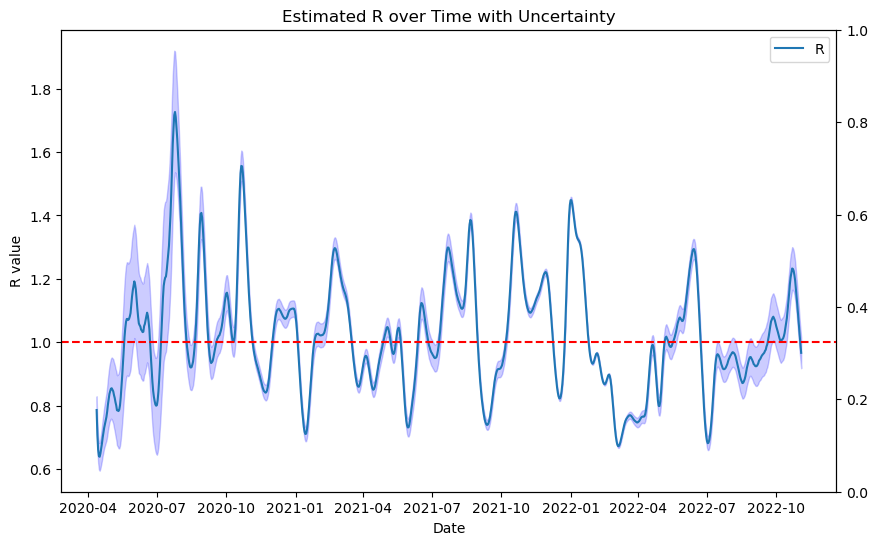

In [34]:
# Plot the results from the previous cell
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the R estimates with uncertainty
sns.lineplot(data=r_estimates, x=r_estimates.index, y='R_mean', ax=ax, label='R')
ax.fill_between(r_estimates.index, r_estimates['R_mean'] - r_estimates['R_std'], r_estimates['R_mean'] + r_estimates['R_std'], color='b', alpha=0.2, label='R_std')
ax.axhline(y=1, color='r', linestyle='--', label='R=1')
ax.set_xlabel('Date')
ax.set_ylabel('R value')
ax.set_title('Estimated R over Time with Uncertainty')

# Plot the incident data on the twin axis
ax2 = ax.twinx()
sns.lineplot(data=hospital, x=hospital.index, y=hospital, ax=ax2, color='g', label='Incident Data')
ax2.set_ylabel('Incident Data')

ax.legend()
plt.show()

In [35]:
import pymc as pm
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

# Define the SIR model
def SIR_model(t, y, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
S0 = 0.99
I0 = 0.01
R0 = 0.0
y0 = [S0, I0, R0]

# Time points
t = np.linspace(0, 100, 100)

# Observed R values (example data)
R_obs = np.array([0.78843596, 0.71150383, 0.66289627, 0.64019564, 0.63681664,
                  0.6445331, 0.66119279, 0.68034687, 0.6983999, 0.71331924,
                  0.72873873, 0.73886516, 0.7501649, 0.76678487, 0.77994872,
                  0.7942952, 0.80841032, 0.82774465, 0.84001028, 0.84352969,
                  0.84642354, 0.84616422, 0.84338121, 0.83374183, 0.82259294,
                  0.81345853, 0.80554934, 0.79795632, 0.78799997, 0.78669823,
                  0.79520117, 0.80754271, 0.8283006, 0.85634427, 0.89385511,
                  0.93620753, 0.97208123, 1.00983813, 1.03529901, 1.05014702,
                  1.06611123, 1.08140734, 1.09290491, 1.09983065, 1.09641181,
                  1.11140258, 1.12982013, 1.14538746, 1.16677504, 1.1804819,
                  1.18267914, 1.18360481, 1.16307675, 1.13732533, 1.12099681,
                  1.0982526, 1.07766902, 1.06453642, 1.05820409, 1.04992038,
                  1.04277409, 1.0397242, 1.04208068, 1.04451385, 1.05210841,
                  1.06788159, 1.07745923, 1.07809487, 1.06370824, 1.04013859,
                  1.01094897, 0.97686433, 0.93662186, 0.89594093, 0.8590])

# PyMC model
with pm.Model() as model:
    # Priors for the parameters
    beta = pm.Normal('beta', mu=0.3, sigma=0.1)
    gamma = pm.Normal('gamma', mu=0.1, sigma=0.03)
    
    # Solve the ODE using scipy
    def solve_ode(beta, gamma):
        sol = solve_ivp(SIR_model, [t[0], t[-1]], y0, args=(beta, gamma), t_eval=t)
        return np.array(sol.y.T)  # Convert the solution to a NumPy array

    # Use a deterministic variable to store the solution
    y_sol = pm.Deterministic('y_sol', solve_ode(beta, gamma).tolist())
    
    # Constraints
    S = y_sol[:, 0]
    I = y_sol[:, 1]
    R = y_sol[:, 2]
    
    pm.Potential('S_constraint', pm.math.switch(S < 0, -np.inf, 0))
    pm.Potential('S_constraint', pm.math.switch(S > 1, -np.inf, 0))
    pm.Potential('I_constraint', pm.math.switch(I < 0, -np.inf, 0))
    pm.Potential('I_constraint', pm.math.switch(I > 1, -np.inf, 0))
    pm.Potential('R_constraint', pm.math.switch(R < 0, -np.inf, 0))
    pm.Potential('R_constraint', pm.math.switch(R > 1, -np.inf, 0))
    pm.Potential('sum_constraint', pm.math.switch(S + I + R - 1, -np.inf, 0))
    
    # Likelihood
    R_obs = pm.Normal('R_obs', mu=R, sigma=0.1, observed=R_obs)
    
    # Sample from the posterior
    trace = pm.sample(1000, tune=1000, cores=2)

# Analyze the results
pm.traceplot(trace)
plt.show()
pm.summary(trace)


ValueError: setting an array element with a sequence.

In [97]:
lib = sunode._cvodes.lib
lib.CVodeSStolerances(solver._ode, 1e-10, 1e-10)
lib.CVodeSStolerancesB(solver._ode, solver._odeB, 1e-8, 1e-8)
lib.CVodeQuadSStolerancesB(solver._ode, solver._odeB, 1e-8, 1e-8)
lib.CVodeSetMaxNumSteps(solver._ode, 5000)
lib.CVodeSetMaxNumStepsB(solver._ode, solver._odeB, 5000)

0

In [98]:
with model:
    idata = pm.sample(tune=1000, draws=1000, chains=6, cores=6)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [hares_start, lynx_start, ratio, fixed_hares, period, log_speed_ratio, sd]


Output()


[CVODES ERROR]  CVode
  The right-hand side routine failed at the first call.


[CVODES ERROR]  CVode
  The right-hand side routine failed at the first call.


[CVODES ERROR]  CVode
  The right-hand side routine failed at the first call.


[CVODES ERROR]  CVode
  The right-hand side routine failed at the first call.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.22166e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.64433e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.64433e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.64433e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.64433e-14 are such that t + h = t on the next step. The solve


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1916.01 and h = 9.06171e-14 are such that t + h = t on the next step. The solver will continue a


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.66676e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.34669e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.34669e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.34669e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.34669e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.10026e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5878e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5878e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5878e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5878e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5878e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5878e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.40176e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.4582e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  C


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.24279e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.24279e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.15163e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.15163e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.15163e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.15163e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.15163e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.40126e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.63358e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 1.63358e-23, the error test failed repeatedly or with |h| = hmin.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.63358e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 1.63358e-23, the error test failed repeatedly or with |h| = hmin.




[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.6257e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.6257e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.6257e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.6257e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.6257e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING] 


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.06517e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.06517e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.9146e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.9146e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.9146e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.9146e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.9146e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING] 


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5783e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5783e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5783e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5783e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5783e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.5783e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.19491e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-21 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-21 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-21 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-21 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-21 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.55299e-21 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.2207e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  C


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.56305e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.19327e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.19327e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.19327e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.19327e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.19327e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.19327e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1908.89 and h = 1.40334e-06, the error test failed repeatedly or with |h| = hmin.


[CVODES ERROR]  CVode
  At t = 1908.89


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.5328e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 7.5328e-24, the error test failed repeatedly or with |h| = hmin.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.5328e-18 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 7.5328e-24, the error test failed repeatedly or with |h| = hmin.




[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.78746e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.78746e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.78746e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.78746e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.78746e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.78746e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.42824e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.81139e-19 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.70446e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.41933e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.41933e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.47403e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.47403e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.47403e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.47403e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.47403e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.82025e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.82025e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.82025e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.82025e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.82025e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.82025e-14 are such that t + h = t on the next step. The solver will continue anyway.




[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.49628e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.49628e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.49628e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.49628e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.49628e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.49628e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.13129e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.13129e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.13129e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.13129e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.13129e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.21679e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.21679e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.21679e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.21679e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.21679e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 3.16872e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 5.41025e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.17394e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.17394e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.17394e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.17394e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.17394e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.17394e-14 are such that t + h = t on the next step. The solver will continue anyway.




[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.19422e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 2.19422e-21, the error test failed repeatedly or with |h| = hmin.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 2.19422e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 2.19422e-21, the error test failed repeatedly or with |h| = hmin.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.08128e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.08128e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 7.08128e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.54747e-14 are su


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.18403e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN


[CVODES ERROR]  CVode
  At t = 1901.71 and h = 8.44571e-07, the error test failed repeatedly or with |h| = hmin.


[CVODES ERROR]  CVode
  At t = 1901.71 and h = 8.44571e-07, the error test failed repeatedly or with |h| = hmin.




[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 8.44214e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.22107e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARN

Sampling 6 chains for 1_000 tune and 1_000 draw iterations (6_000 + 6_000 draws total) took 191 seconds.


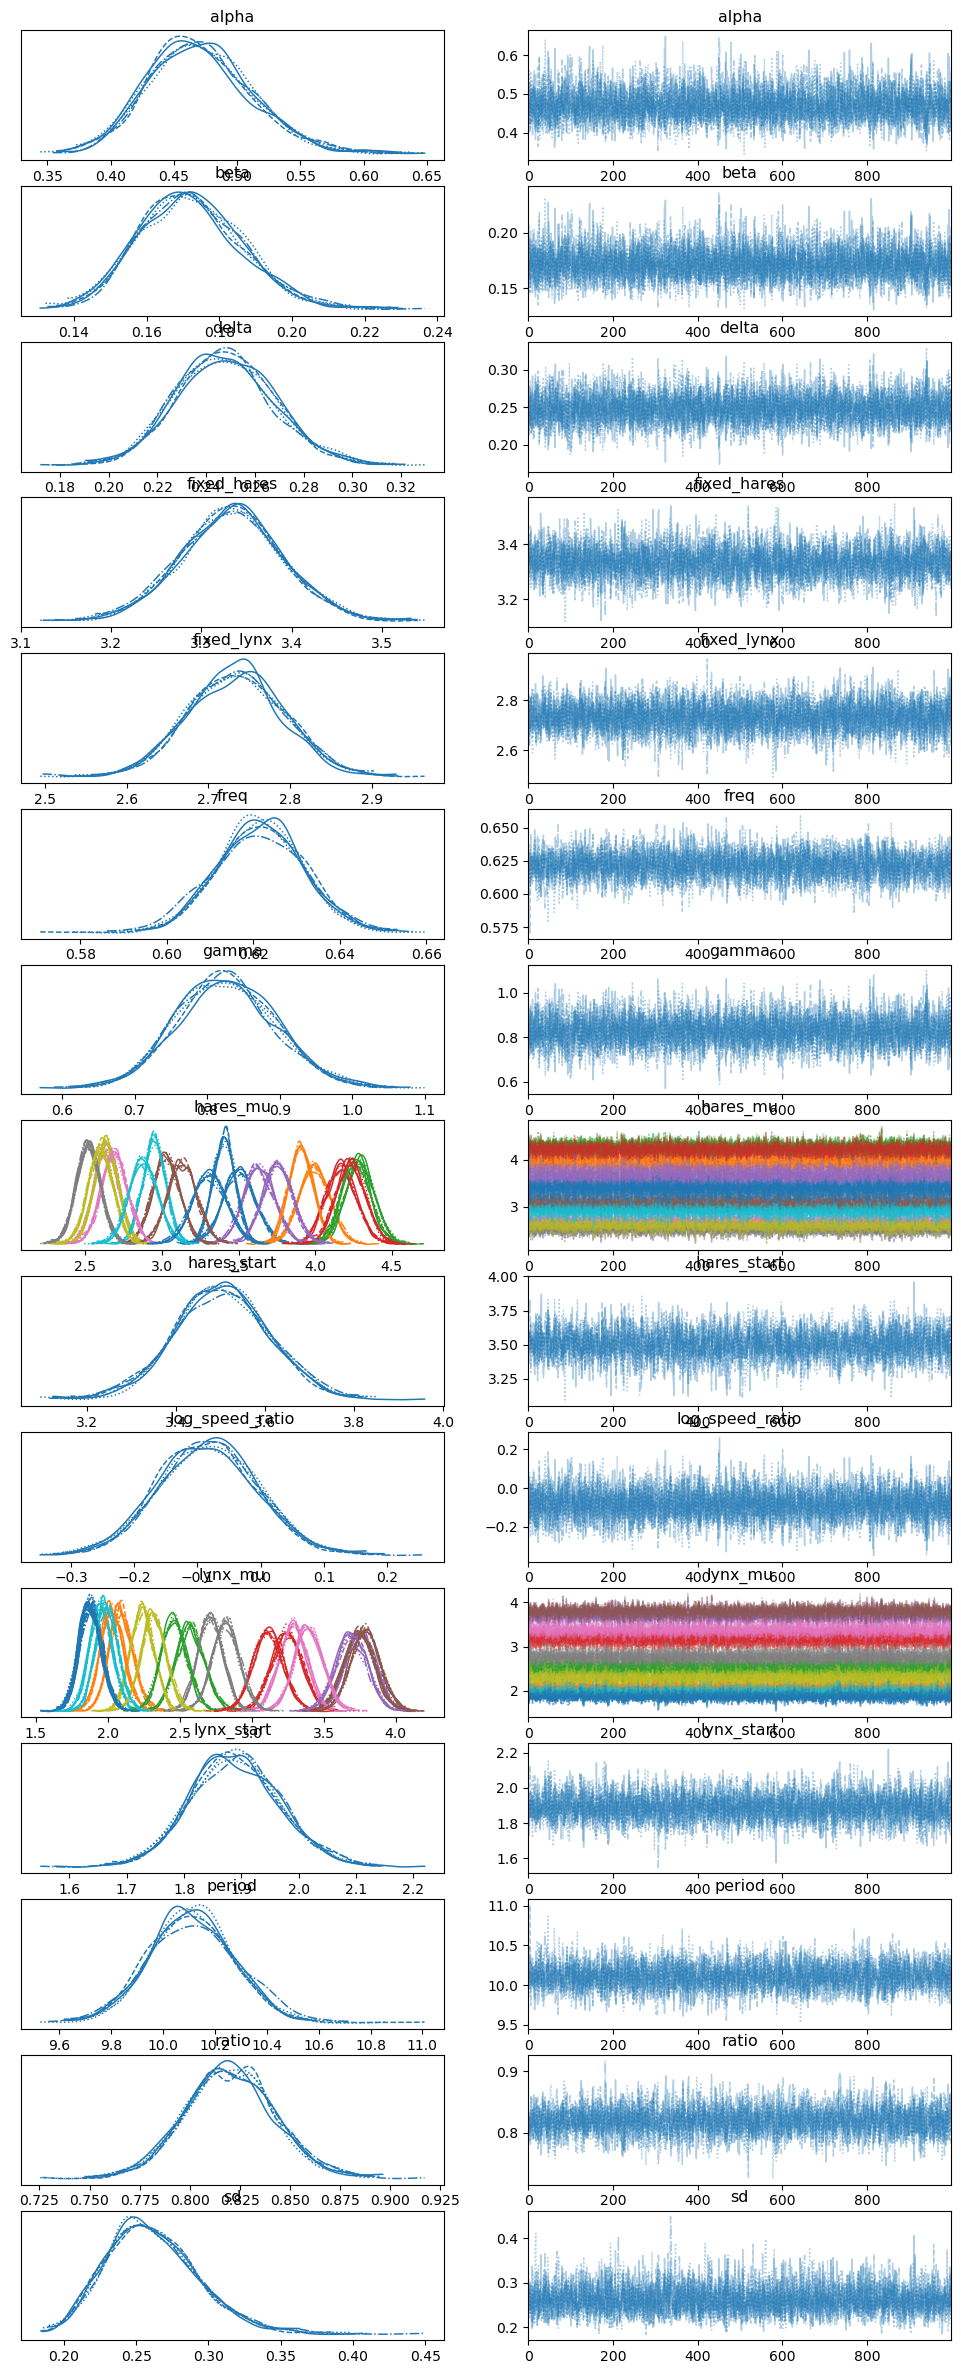

/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (55) in plot_posterior, generating only 40 plots
  warnings.warn(


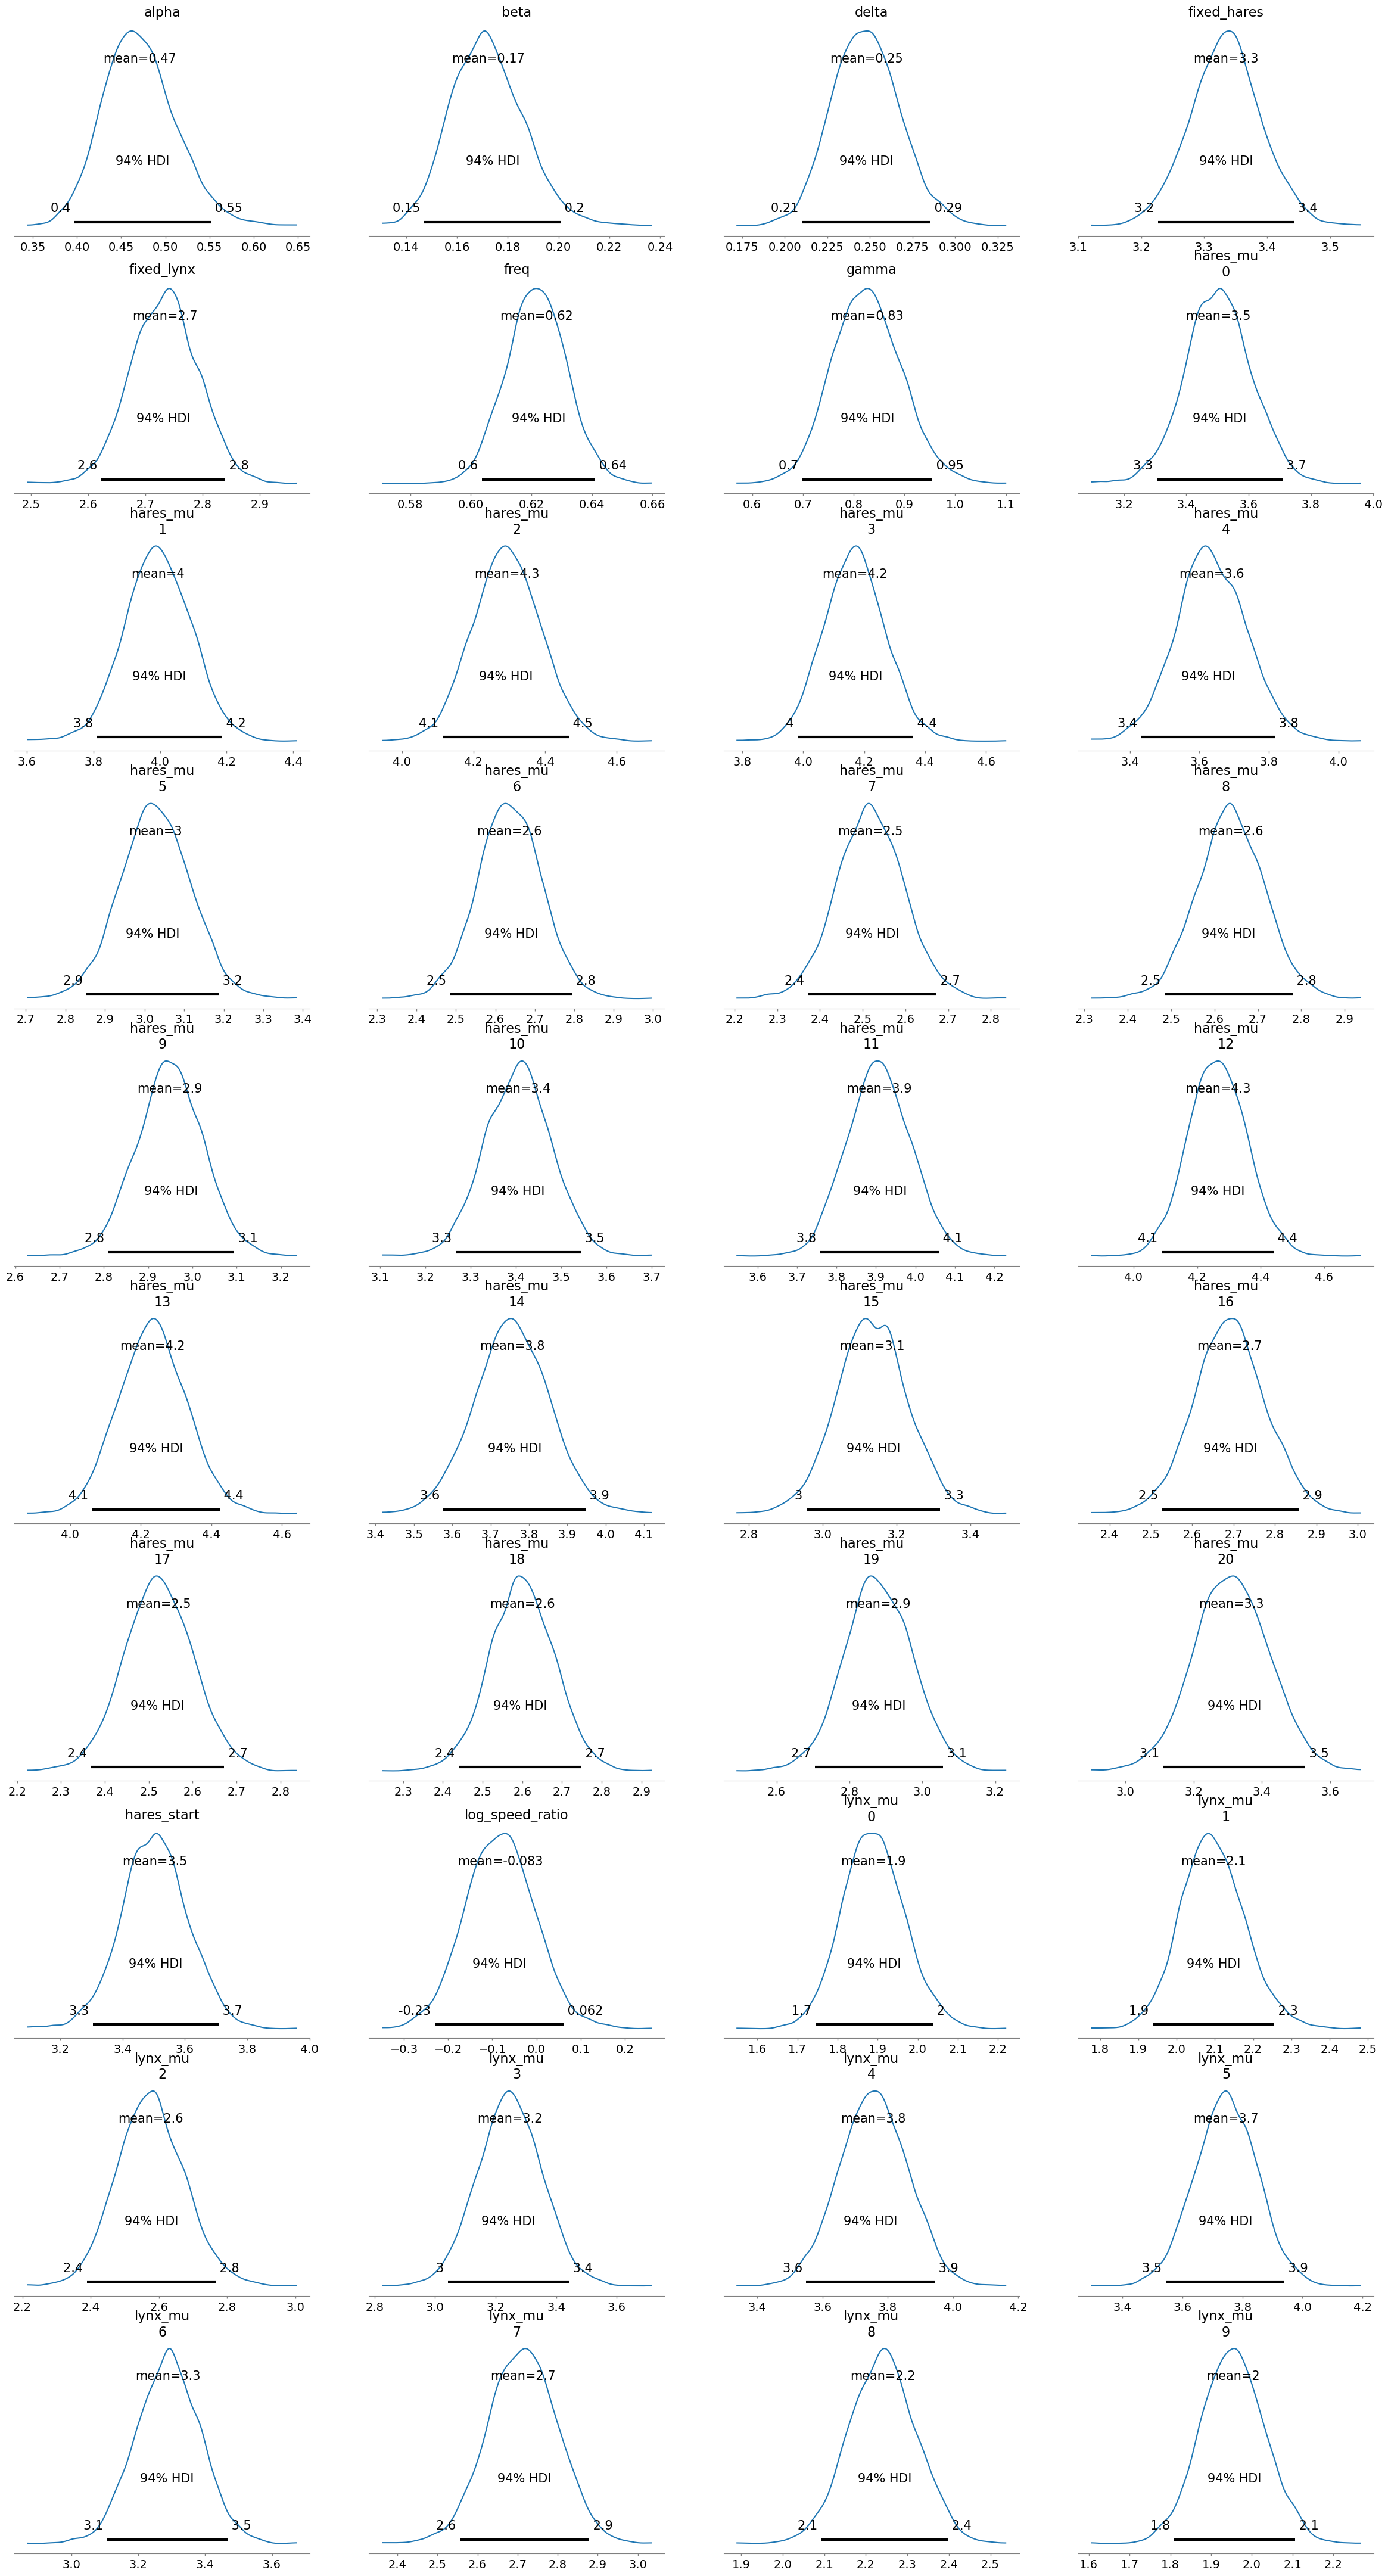

/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/pairplot.py:233: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


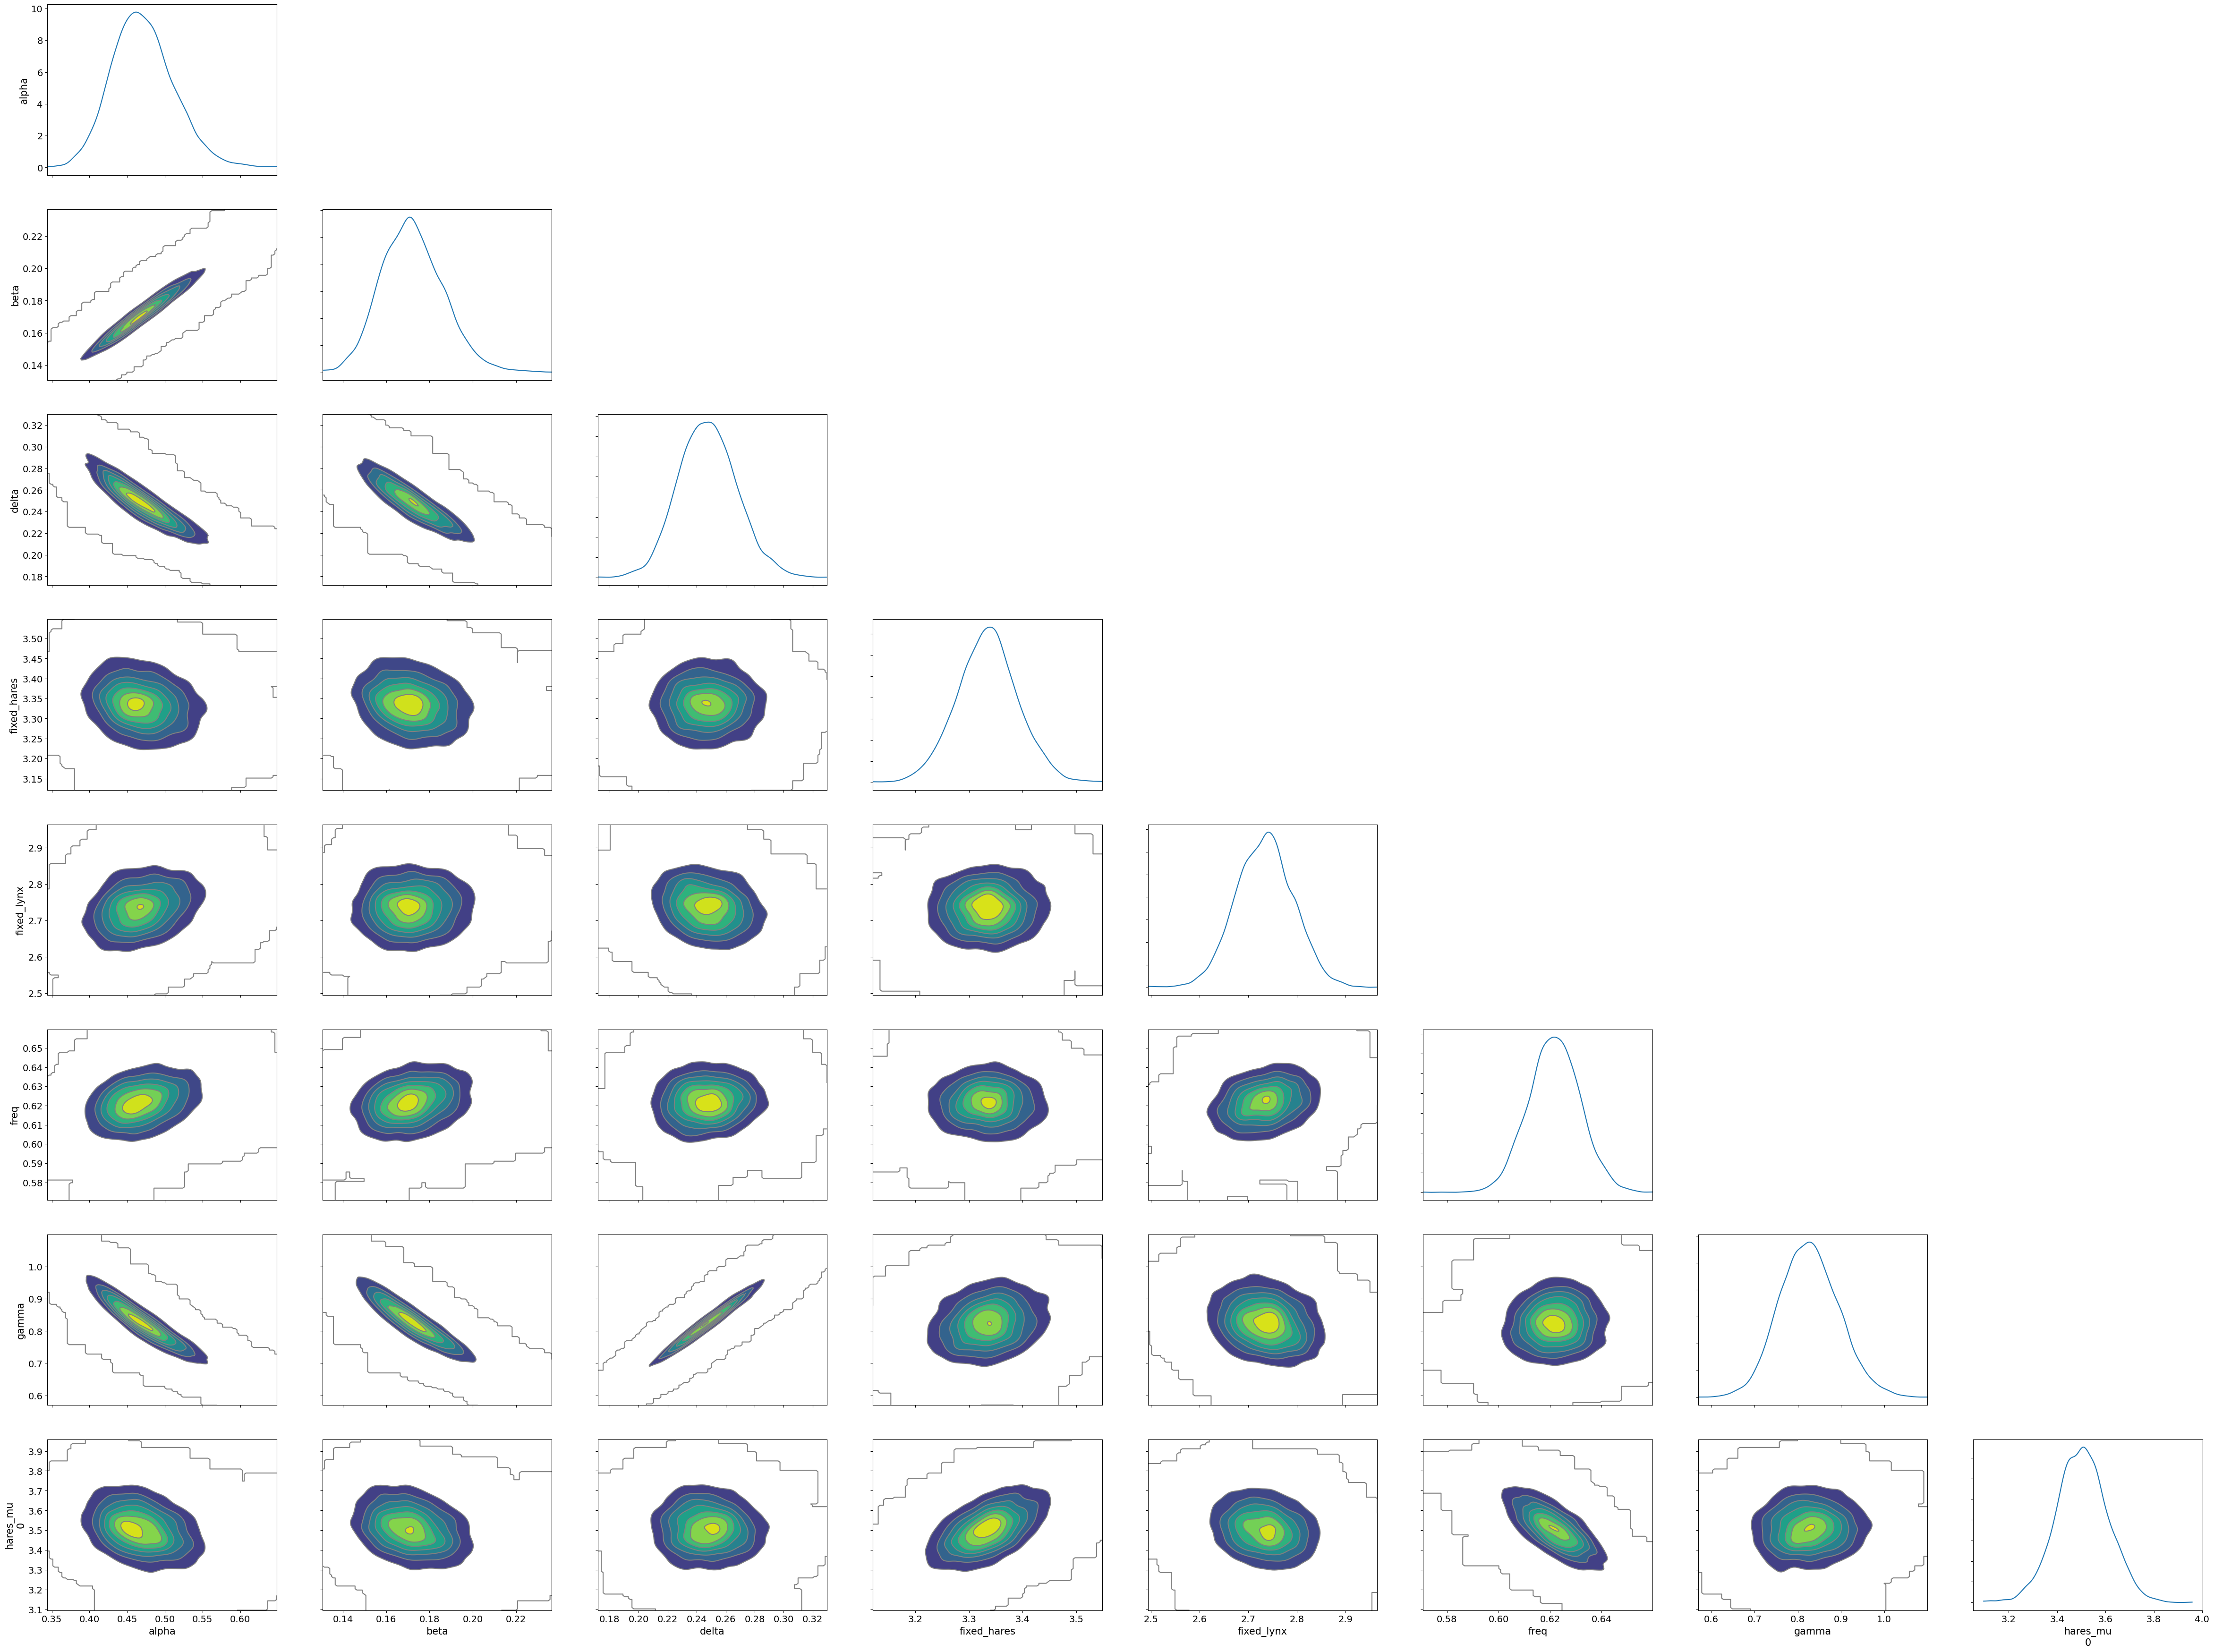

                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha             0.471  0.041   0.397    0.551      0.001    0.000    4981.0   
beta              0.172  0.014   0.147    0.201      0.000    0.000    5815.0   
delta             0.248  0.020   0.210    0.285      0.000    0.000    5512.0   
fixed_hares       3.334  0.057   3.227    3.442      0.001    0.001    4360.0   
fixed_lynx        2.734  0.059   2.622    2.840      0.001    0.001    4891.0   
freq              0.622  0.010   0.604    0.641      0.000    0.000    4606.0   
gamma             0.826  0.069   0.699    0.955      0.001    0.001    5323.0   
hares_mu[0]       3.503  0.107   3.305    3.708      0.002    0.001    3906.0   
hares_mu[1]       3.994  0.101   3.810    4.186      0.002    0.001    4313.0   
hares_mu[2]       4.293  0.095   4.113    4.467      0.001    0.001    5536.0   
hares_mu[3]       4.169  0.102   3.982    4.361      0.001    0.001    5728.0   
hares_mu[4]       3.634  0.1

In [96]:
import arviz as az

# Trace plot
az.plot_trace(idata)
plt.show()

# Posterior plot
az.plot_posterior(idata)
plt.show()

# Pair plot
az.plot_pair(idata, kind='kde', marginals=True)
plt.show()

# Summary of the inference data
summary = az.summary(idata)
print(summary)

In [1]:
import torch

# Check if GPU is available
print(torch.cuda.is_available())

False


# Variants


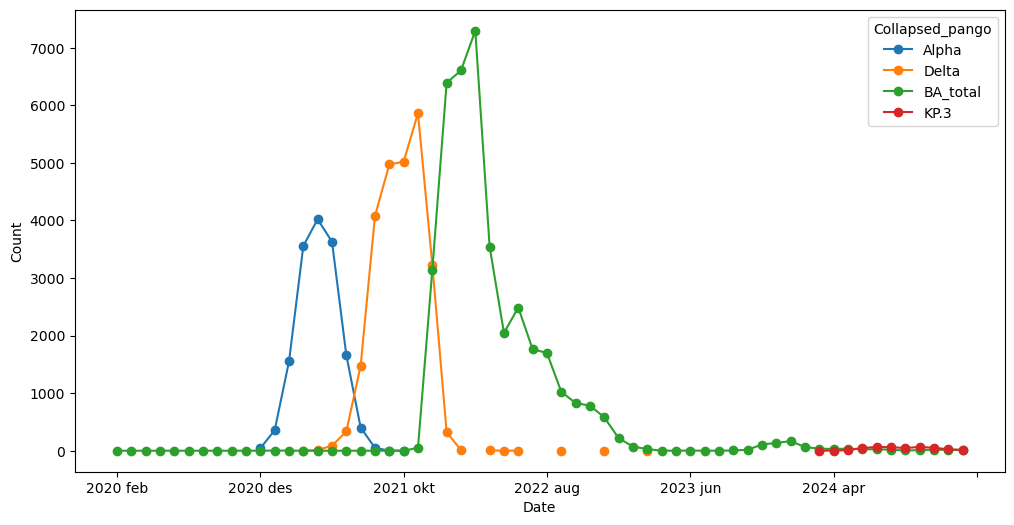

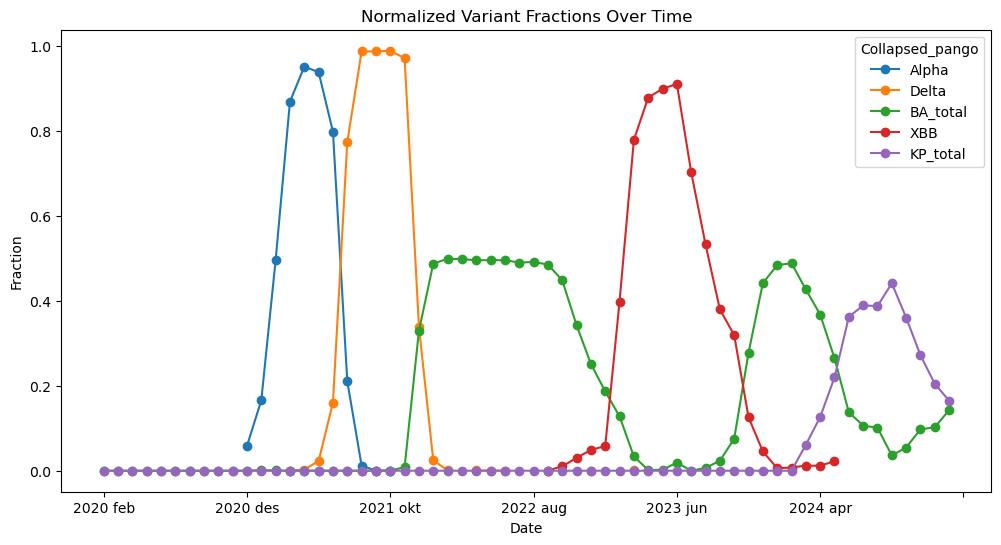

In [26]:
# Read the Excel file "2025-02-07-fordeling....xlsx" into a DataFrame
# Replace the filename with the correct path if necessary
fordeling_df = pd.read_excel("2025-02-07-fordeling-av-sars-cov-2-varianter-i-norge.xlsx")
fordeling_df.head()
# Transpose the dataframe so that dates become the index and strains become columns
fordeling_transposed = fordeling_df.set_index('Collapsed_pango').T

# The index is now the date, and columns are strains
fordeling_transposed.index.name = 'date'
fordeling_transposed.head()
# Sum all columns in fordeling_transposed that start with 'BA' into a new column 'BA_total'
ba_cols = [col for col in fordeling_transposed.columns if col.startswith('BA')]
fordeling_transposed['BA_total'] = fordeling_transposed[ba_cols].sum(axis=1)

kp_cols = [col for col in fordeling_transposed.columns if col.startswith('KP')]
fordeling_transposed['KP_total'] = fordeling_transposed[kp_cols].sum(axis=1)
# Plot Alpha and Beta variant counts as a function of time
fig, ax = plt.subplots(figsize=(12, 6))
fordeling_transposed[['Alpha','Delta','BA_total','KP.3']].plot(ax=ax, marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
# Normalize the selected variant counts by the total for each time point
variant_cols = ['Alpha', 'Delta', 'BA_total', 'XBB','KP_total']
normalized = fordeling_transposed[variant_cols].div(fordeling_transposed.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
normalized.plot(ax=ax, marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Fraction')
ax.set_title('Normalized Variant Fractions Over Time')
plt.show()